In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_dir = '../data/merged/'
files = os.listdir(base_dir)
tmp = []
for f in files:
    if f.endswith('tsv'):
        tmp.append(f)
        
files = tmp
print(len(files))
files

35


['CatGifs.tsv',
 'TwoXChromosomes.tsv',
 'NeutralPolitics.tsv',
 'OhioStateFootball.tsv',
 'FULLCOMMUNISM.tsv',
 'demsocialist.tsv',
 'dogs_short.tsv',
 'Libertarian_short.tsv',
 'TwoXChromosomes_short.tsv',
 'StartledCats.tsv',
 'Dogtraining.tsv',
 'cats.tsv',
 'TheRedPill.tsv',
 'Republican.tsv',
 'Liberal.tsv',
 'socialism.tsv',
 'TrollXChromosomes_short.tsv',
 'communism.tsv',
 'PussyPass.tsv',
 'republicans.tsv',
 'MensRights_short.tsv',
 'progressive.tsv',
 'MichiganWolverines.tsv',
 'TheRedPill_short.tsv',
 'CatsStandingUp.tsv',
 'puppies.tsv',
 'GreenParty.tsv',
 'dogs.tsv',
 'democrats.tsv',
 'socialism_short.tsv',
 'pussypassdenied.tsv',
 'OSU.tsv',
 'msu.tsv',
 'dogpictures.tsv',
 'uofm.tsv']

In [3]:
keep_cols = ['controversiality', 'num_reports', 'ATTACK_ON_AUTHOR', 'downs',
             'ATTACK_ON_COMMENTER', 'INFLAMMATORY', 'LIKELY_TO_REJECT', 
             'INCOHERENT', 'UNSUBSTANTIAL',
             'OBSCENE', 'SEVERE_TOXICITY', 'TOXICITY', 'politeness', 'sentiment']

scores = ['controversiality', 'ATTACK_ON_AUTHOR', 
             'ATTACK_ON_COMMENTER', 'INFLAMMATORY', 'LIKELY_TO_REJECT', 
             'INCOHERENT', 'UNSUBSTANTIAL',
             'OBSCENE', 'SEVERE_TOXICITY', 'TOXICITY', 'politeness', 'sentiment']

In [4]:
tmp = pd.read_csv('../data/merged/uofm.tsv', sep='\t')
tmp.head()

author                                               body  \
0   NinetyNine90  On the bright side it makes getting campus job...   
1         Ivor97  Wolverine Access is great.  It's just really u...   
2  Shadowhawk109  IIRC spring break coincides with project 3 of ...   
3      [deleted]                                          [deleted]   
4        1gaybro  In my experience the Greyhound picks you up at...   

   controversiality  created edited  gilded       id is_submitter    link_id  \
0                 0      NaN  false       0  dbbx41l          NaN  t3_5iwskz   
1                 0      NaN  false       0  dbbx9b9          NaN  t3_5iwskz   
2                 0      NaN  false       0  dbbxxb7          NaN  t3_5ivbxv   
3                 0      NaN  false       0  dbby7ol          NaN  t3_5iwskz   
4                 0      NaN  false       0  dbbya6k          NaN  t3_5iyj2y   

  name     ...       TOXICITY UNSUBSTANTIAL  politeness  sentiment stickied  \
0  NaN     ...       0.097784      0.619758    0.500000     0.5617    False   
1  NaN     ...       0.607831      0.892353    0.437878     0.0343    False   
2  NaN     ...       0.027826      0.686612    0.452687     0.3548    False   
3  NaN     ...            NaN           NaN         NaN        NaN    False   
4  NaN     ...       0.030083      0.434708    0.494651     0.0000    False   

   archived  collapsed  approved_at_utc  ups  created_utc  
0       NaN        NaN              NaN  NaN   1482033546  
1       NaN        NaN              NaN  NaN   1482033799  
2       NaN        NaN              NaN  NaN   1482034976  
3       NaN        NaN              NaN  NaN   1482035489  
4       NaN        NaN              NaN  NaN   1482035614  

[5 rows x 33 columns]

In [5]:
means = {}
sems = {}
for k in keep_cols:
    means[k] = pd.DataFrame()
    sems[k] = pd.DataFrame()

for f in files:
    name = f[:-4]
    print('working on', name)
    raw = pd.read_csv(base_dir+f, sep='\t', index_col=0)
    raw['date'] = pd.to_datetime(raw.created_utc, unit='s')    
    cols = set(keep_cols) - set(raw.columns.values)
    for c in cols:
        raw[c] = np.nan
        
    g = raw.resample('M', on='date')
    g = g[keep_cols]
    gm = g.mean()
    ge = g.sem()
    for k in keep_cols:    
        means[k] = means[k].merge(gm[[k]].rename(columns={k: name}), 
                                how='outer', left_index=True, right_index=True)
        sems[k] = sems[k].merge(ge[[k]].rename(columns={k: name}), 
                                how='outer', left_index=True, right_index=True)

working on CatGifs
working on TwoXChromosomes


/home/jwlock/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


working on NeutralPolitics
working on OhioStateFootball
working on FULLCOMMUNISM
working on demsocialist
working on dogs_short


/home/jwlock/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,9,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


working on Libertarian_short
working on TwoXChromosomes_short
working on StartledCats
working on Dogtraining
working on cats
working on TheRedPill
working on Republican
working on Liberal
working on socialism
working on TrollXChromosomes_short
working on communism
working on PussyPass
working on republicans
working on MensRights_short


/home/jwlock/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (15,18,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


working on progressive
working on MichiganWolverines
working on TheRedPill_short
working on CatsStandingUp
working on puppies
working on GreenParty
working on dogs


/home/jwlock/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


working on democrats
working on socialism_short
working on pussypassdenied
working on OSU
working on msu
working on dogpictures
working on uofm


In [6]:
def plot_v1(means, sems, cols=None, title='Mean rating over time', top=None, bottom=0):
    fig, axs = plt.subplots(figsize=(14,10))

    if cols is None:
        cols = means.columns.values
    for c in cols:
        axs.plot(means.index, means[c])
        axs.fill_between(sems.index, 
                         means[c]-(2*sems[c]), 
                         means[c]+(2*sems[c]), 
                         alpha=0.2)
    axs.legend()
    axs.set_title(title)
    axs.set_ylim(bottom=bottom, top=top)

    plt.show()

def metaplot(topic='main_animals', metric='TOXICITY', top=None):
    
    subreddits = {'animals': ['CatGifs', 'StartledCats', 'cats', 'Dogtraining',
                              'CatsStandingUp', 'puppies', 'dogpictures'],
                  'main_animals': ['dogs_short', 'cats', ],
                  'parties': ['democrats',  'demsocialist', 'GreenParty', 
                               'Republican', 'Libertarian_short'],
                  'Dem_Rep': ['democrats', 'Republican'],
                  'other_politics': ['Liberal', 'progressive', 'FULLCOMMUNISM', 
                                      'communism', 'socialism_short'],
                  'Feminist': ['TwoXChromosomes_short', 'TrollXChromosomes_short'],
                  'MI_Uni': ['uofm', 'OSU', 'msu'],
                  'all': None
                 }
    title = 'Mean ' + metric + ' in subreddits about ' + topic + ' with 95% CI'
    
    bottom=0
    if metric == 'sentiment':
        bottom = None
    
    plot_v1(means[metric],
            sems[metric], 
            cols=subreddits[topic], 
            title=title,
            top=top,
            bottom=bottom
           )
    
    return
print('done')

done


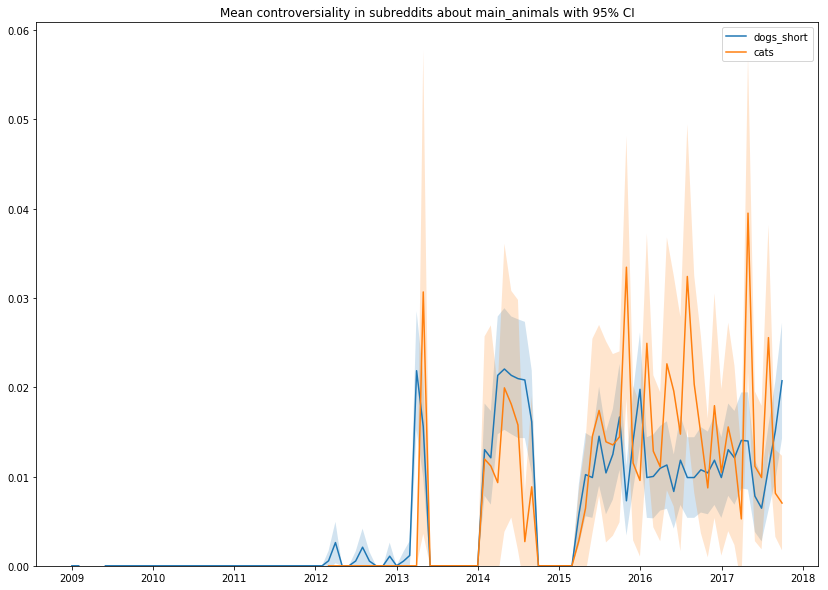

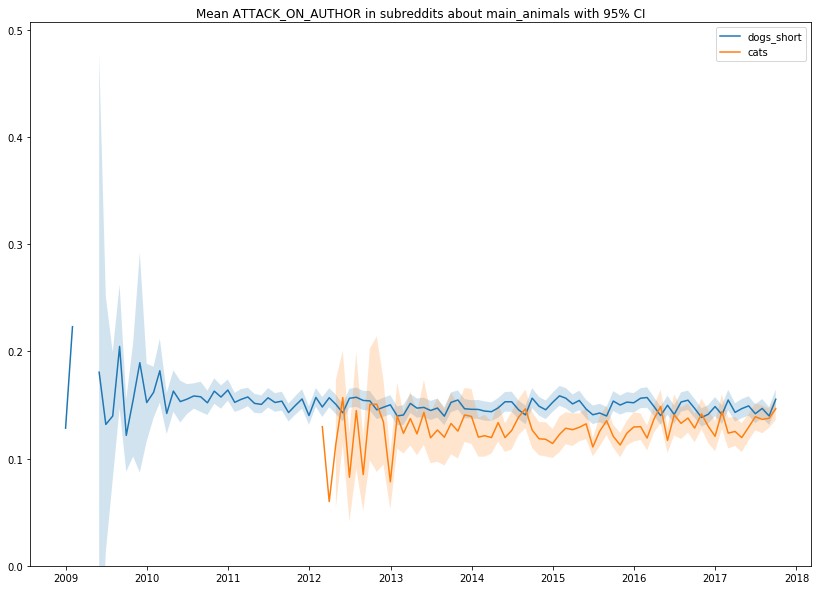

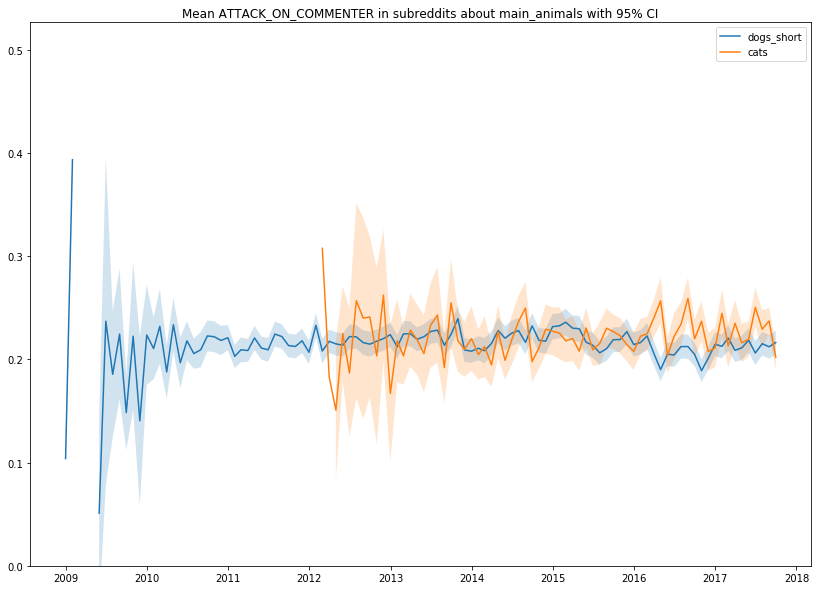

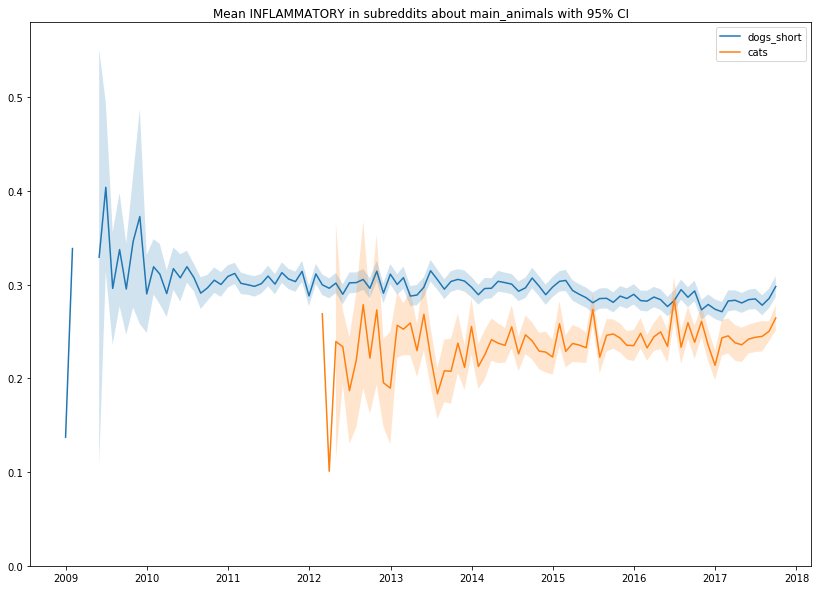

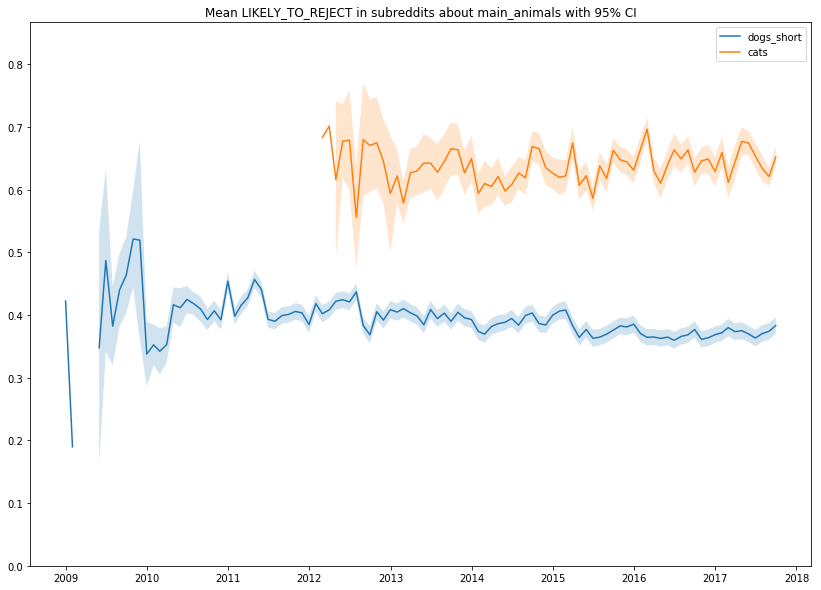

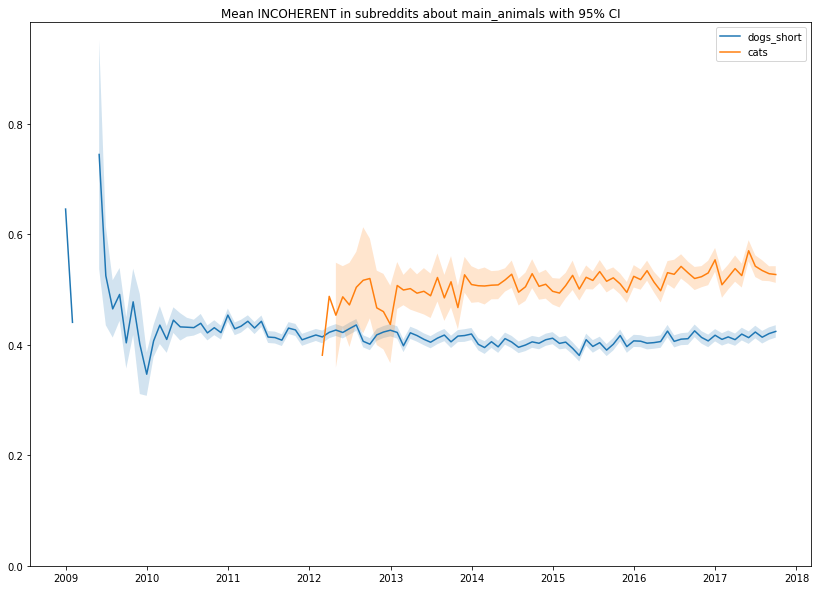

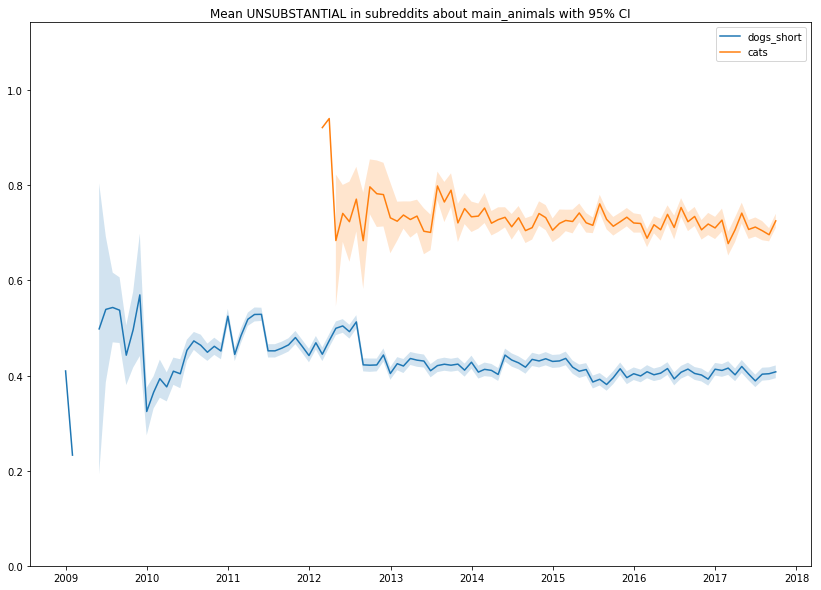

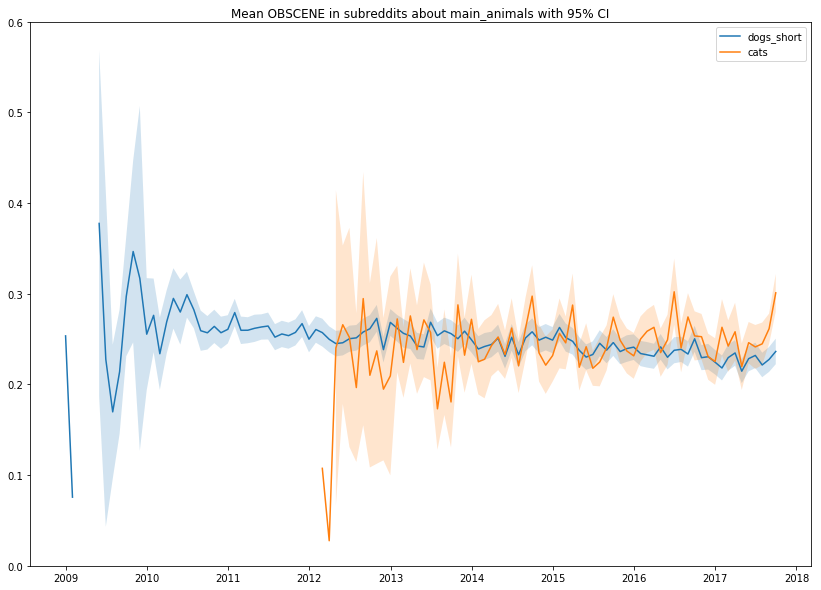

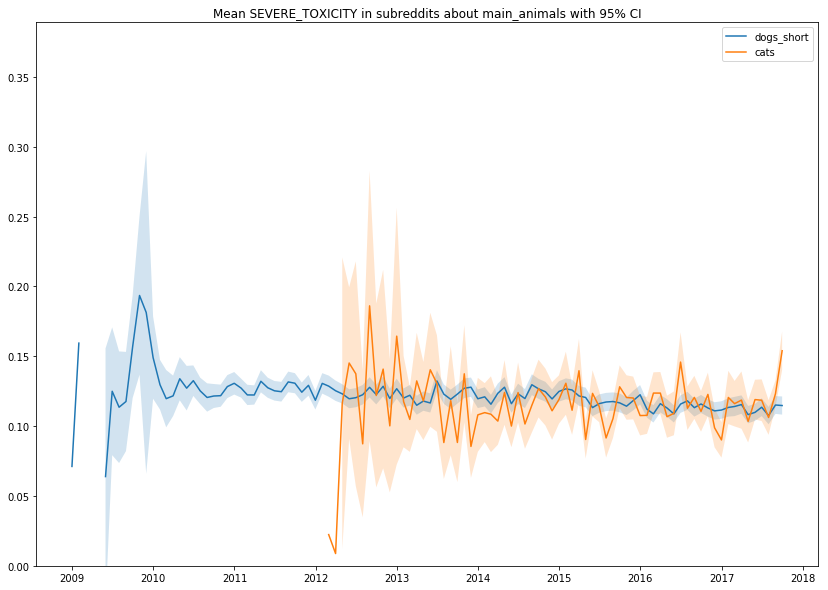

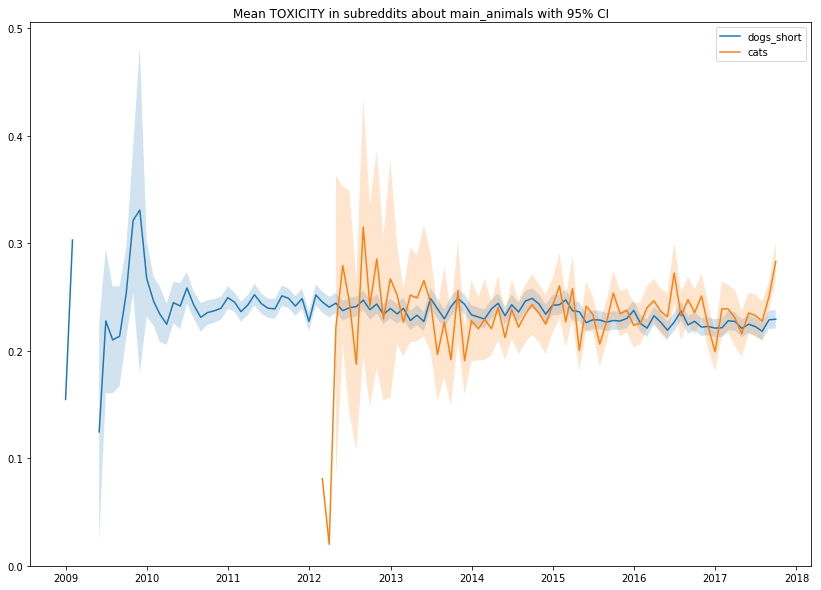

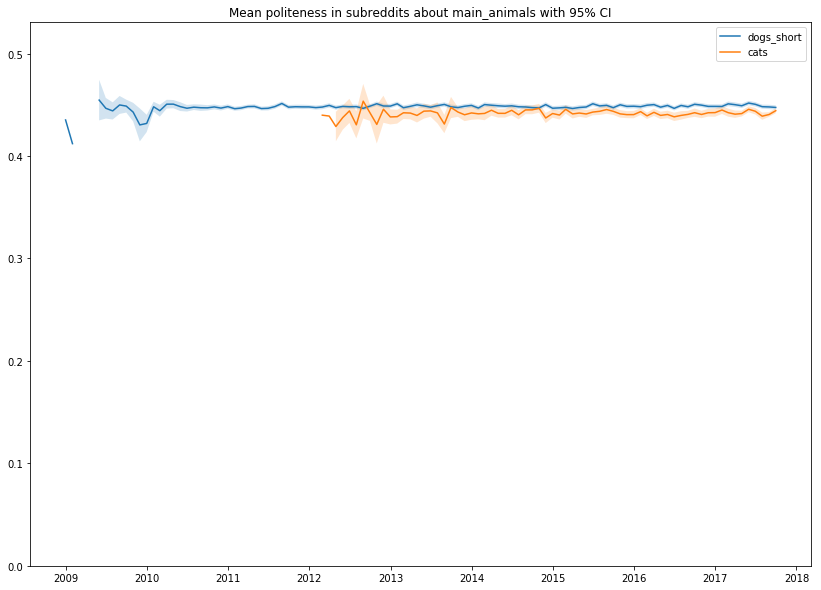

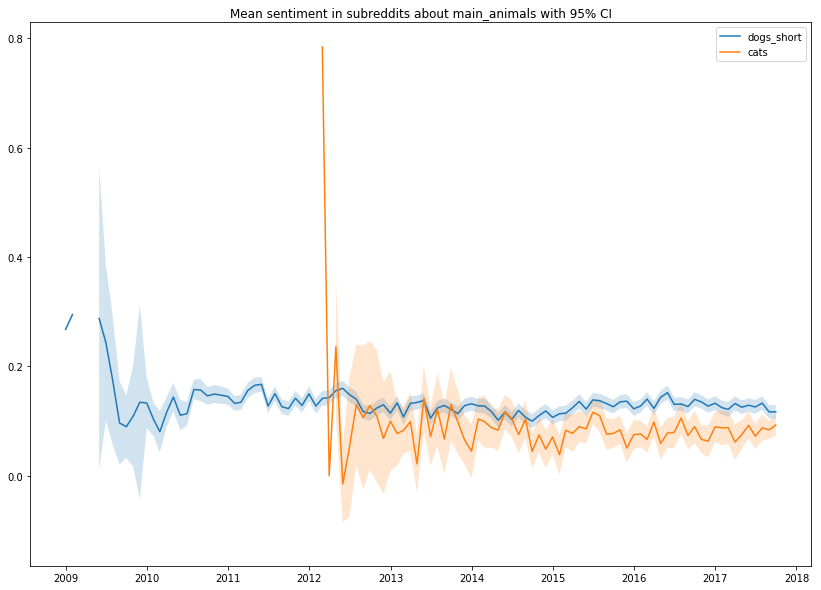

In [9]:
for s in scores:
    metaplot(topic='main_animals', metric=s, top=None)

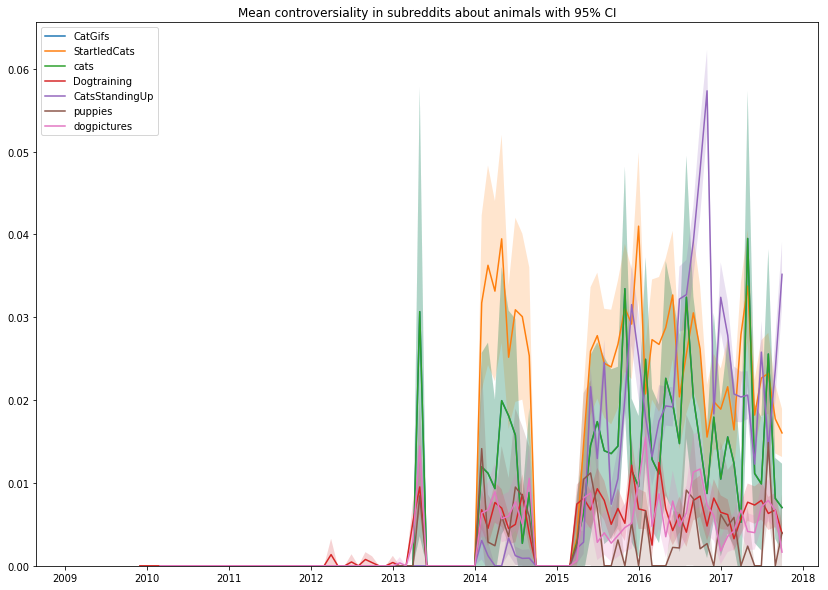

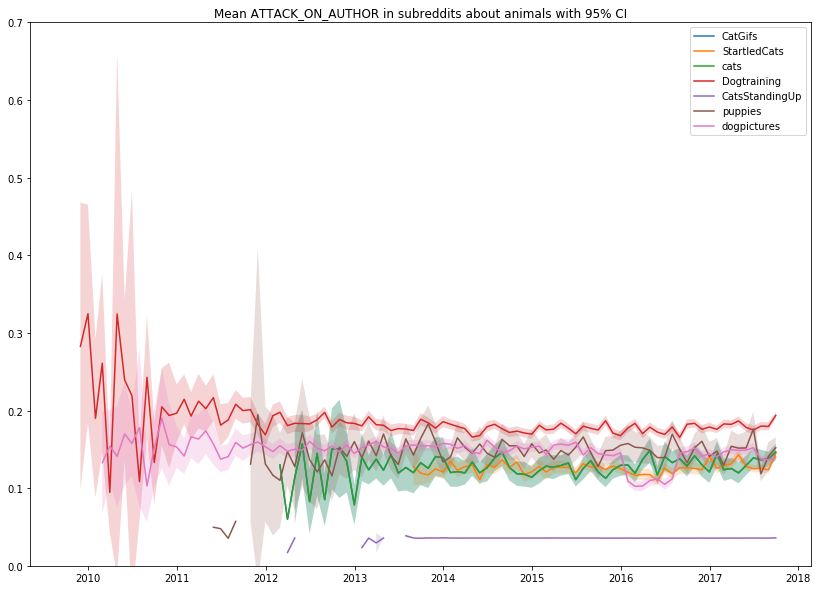

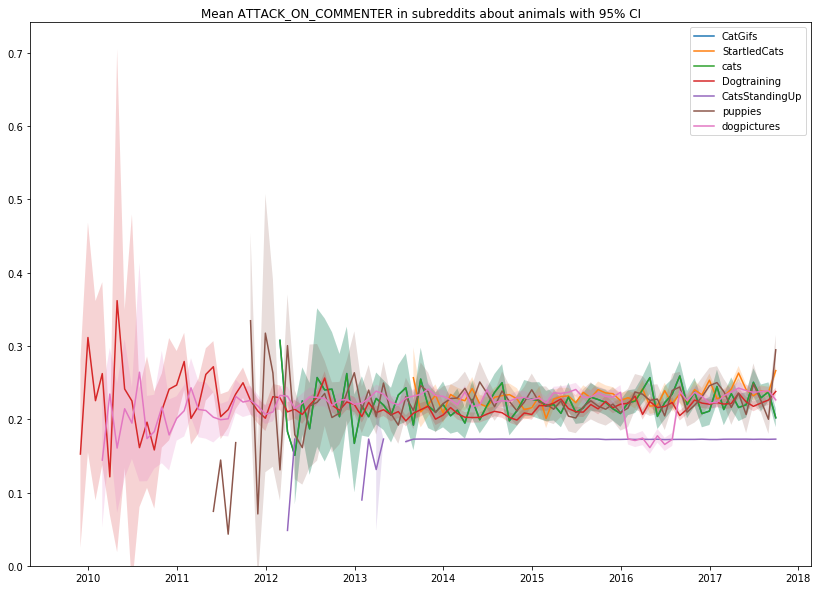

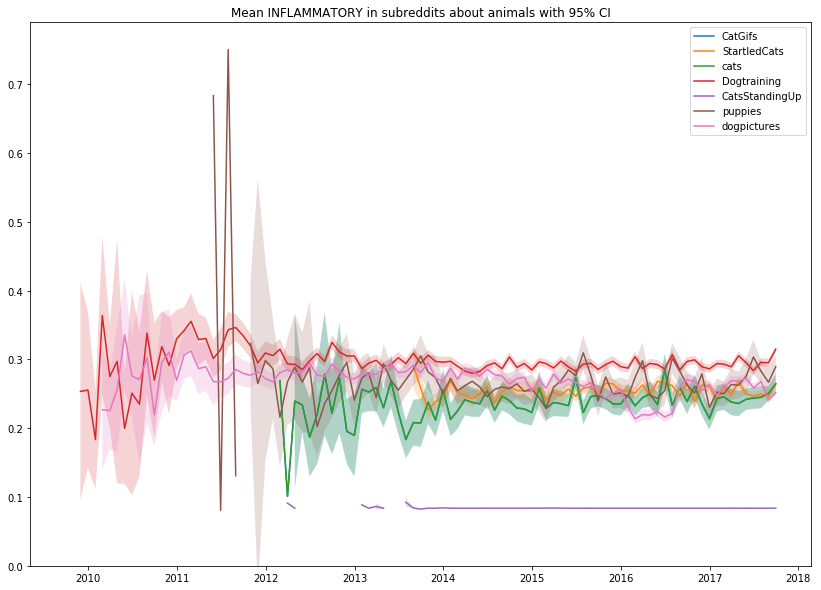

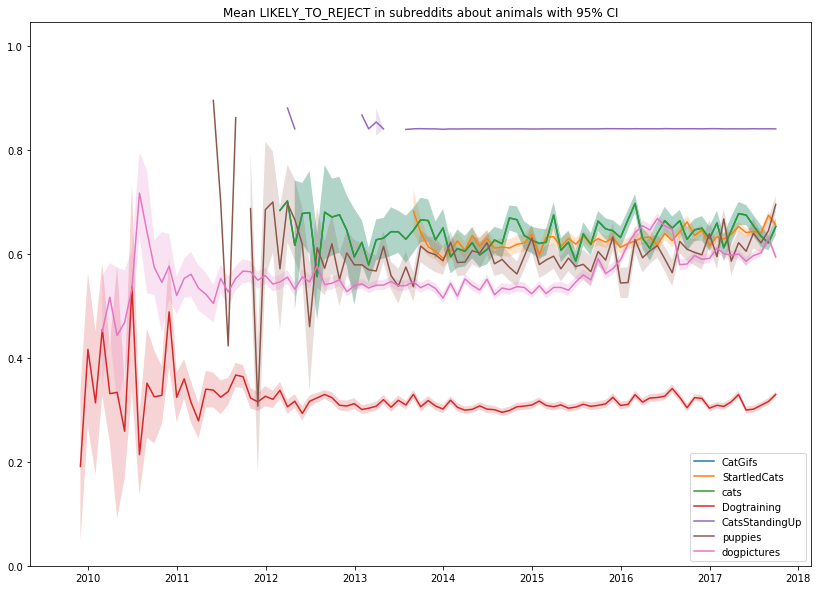

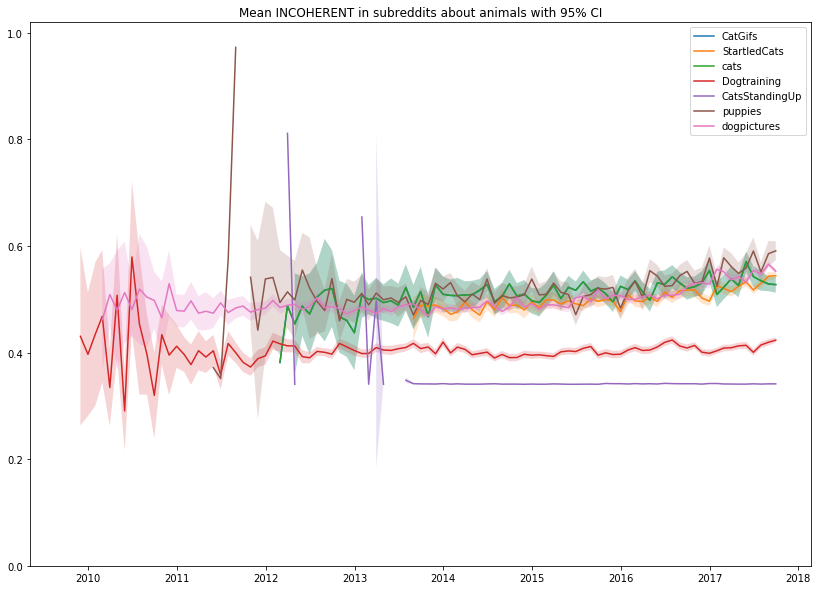

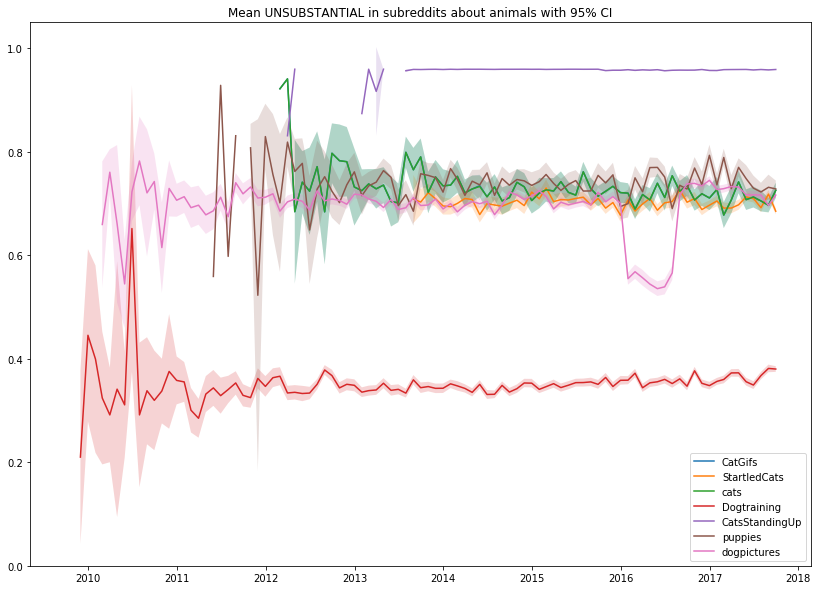

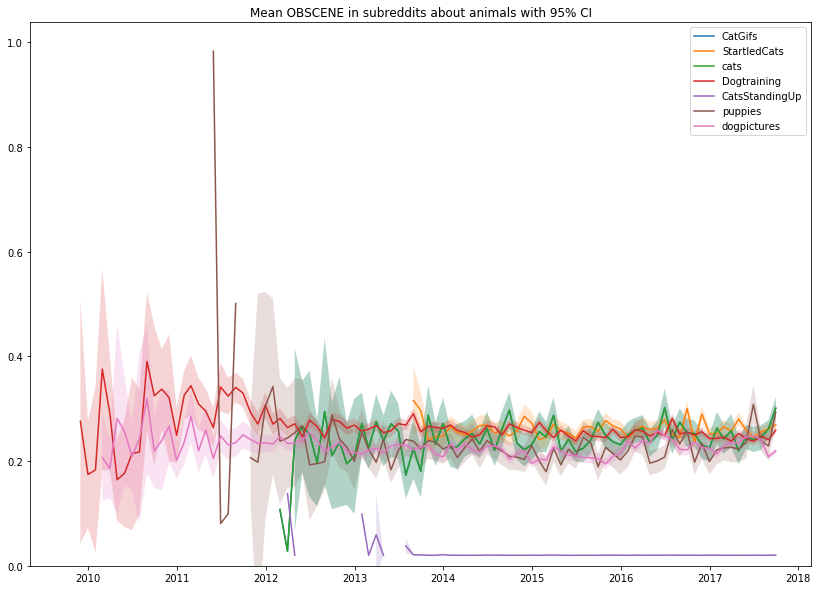

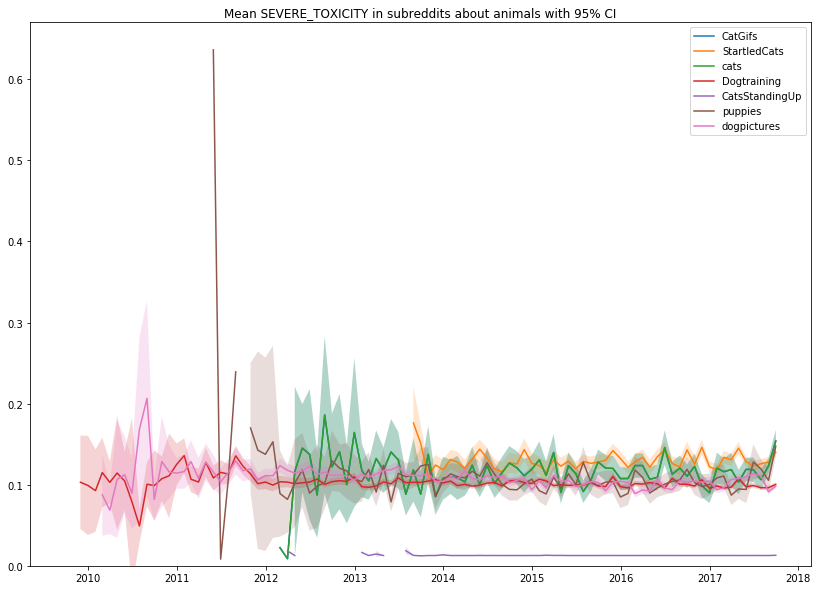

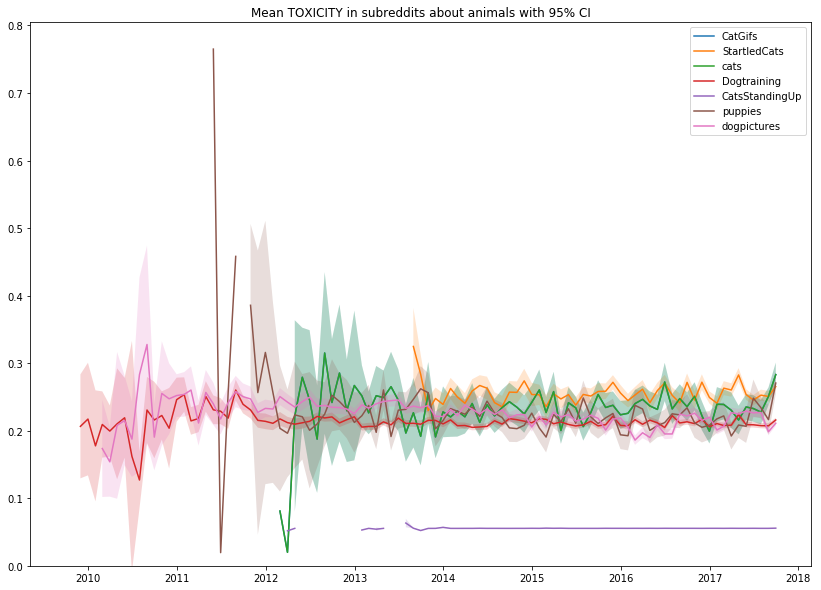

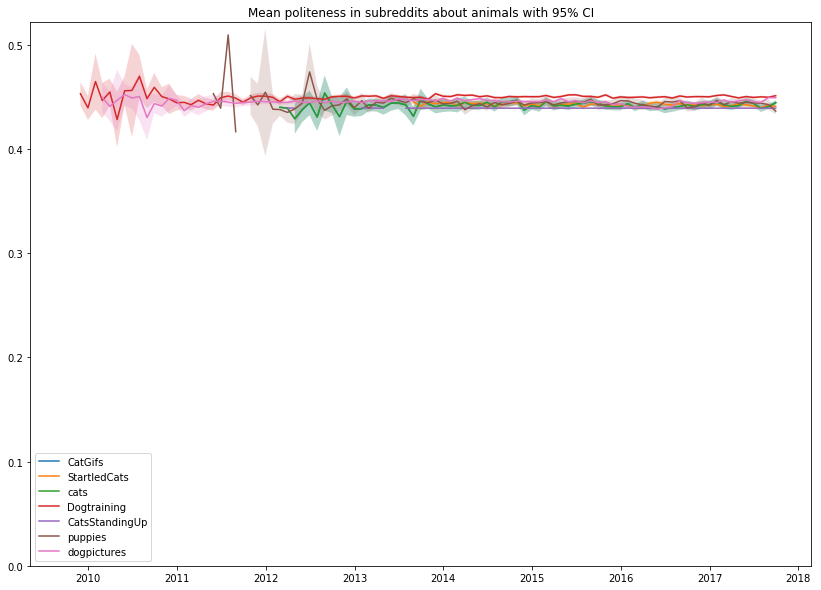

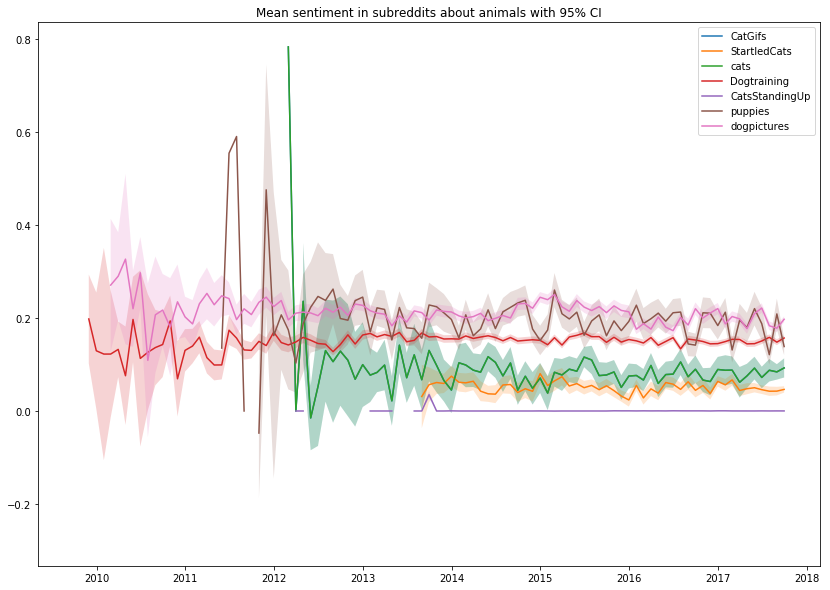

In [10]:
for s in scores:
    metaplot(topic='animals', metric=s, top=None)

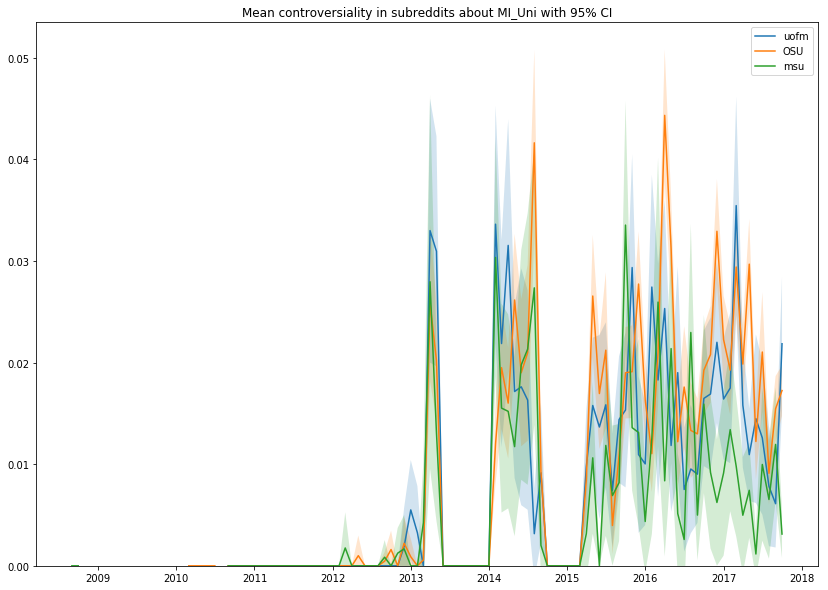

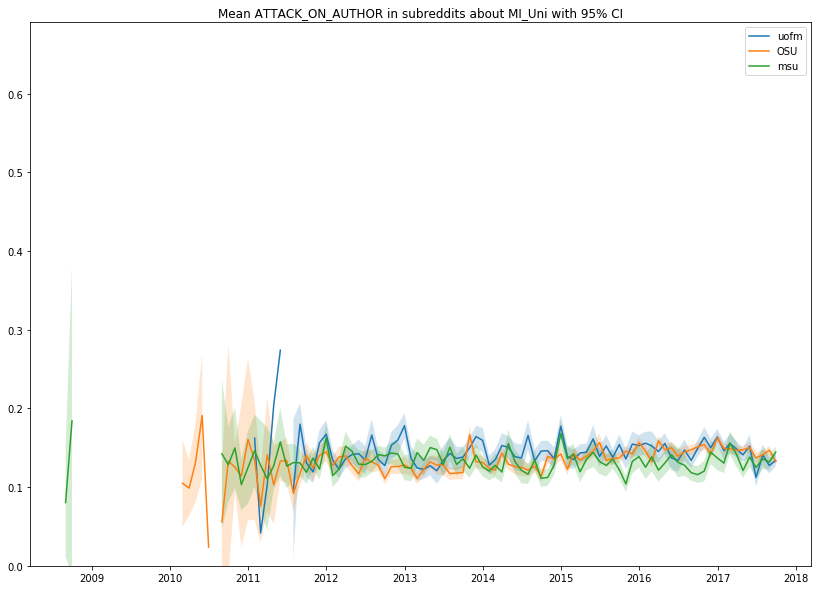

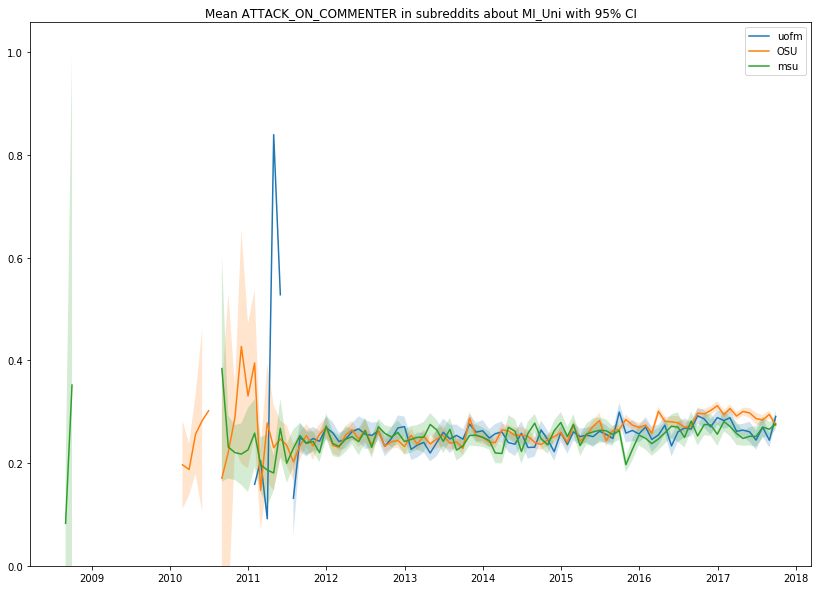

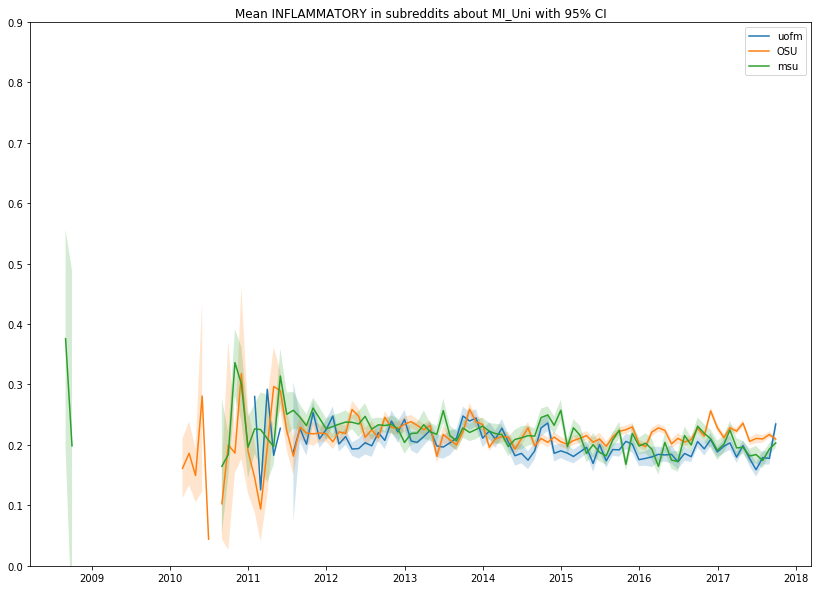

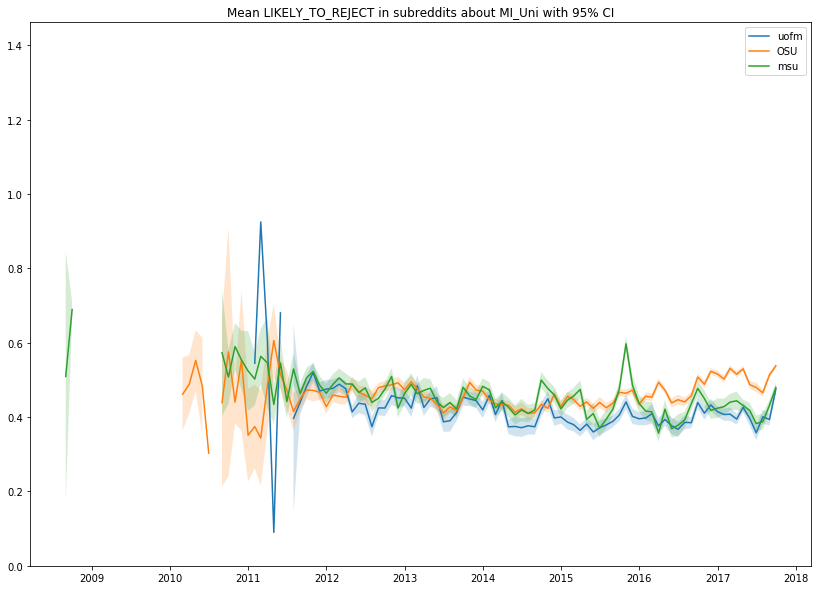

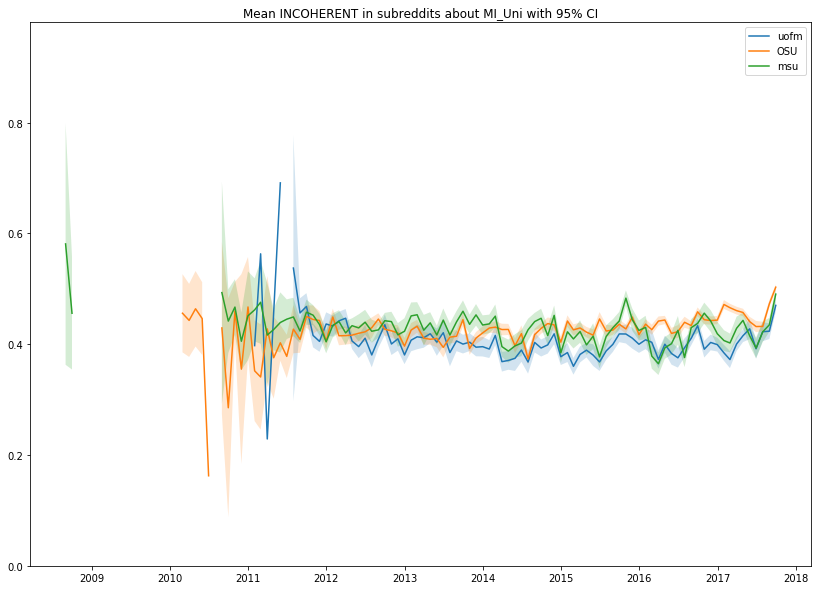

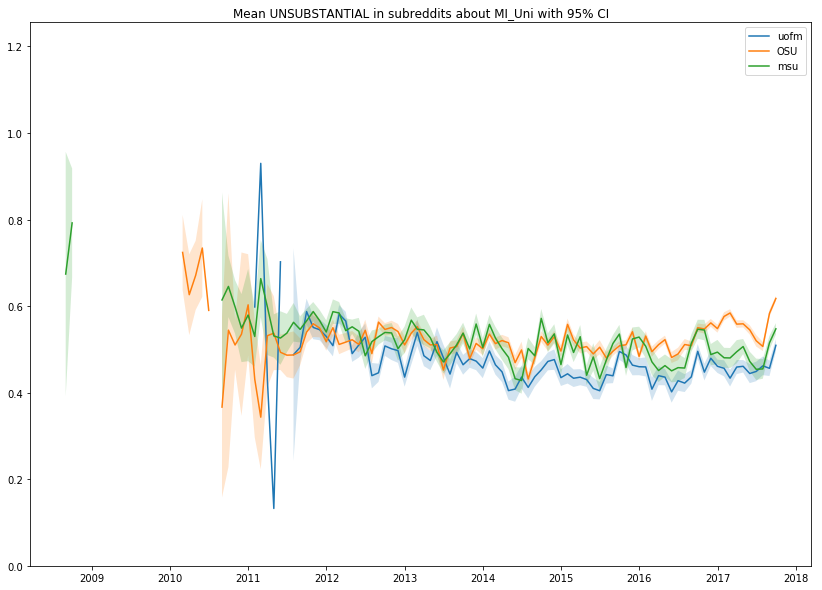

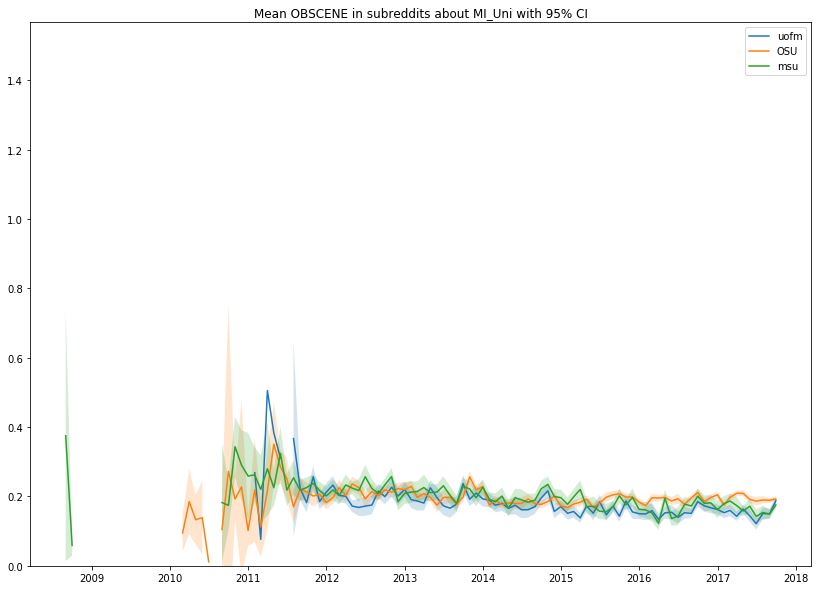

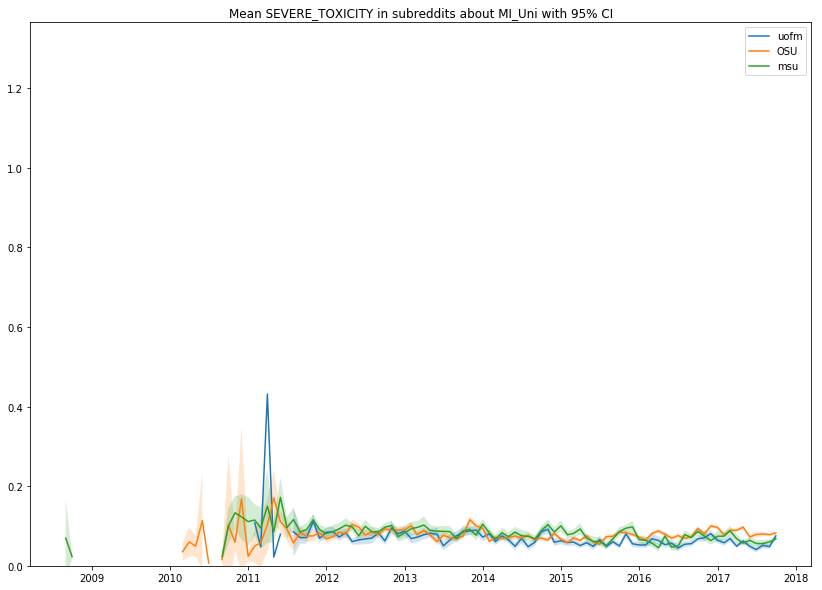

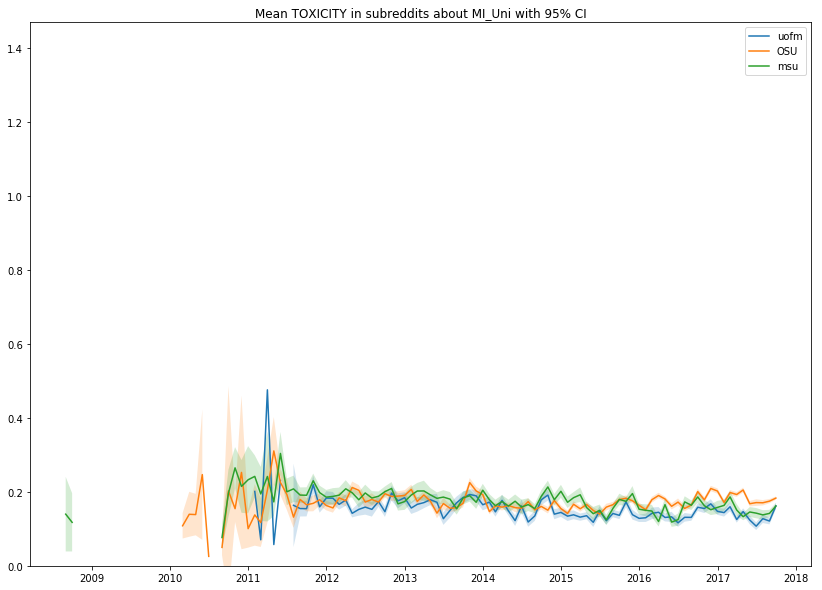

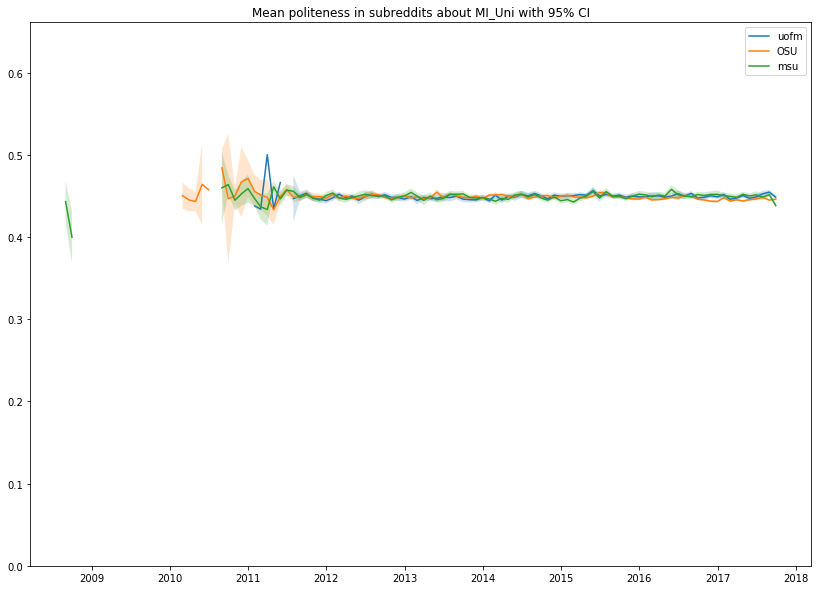

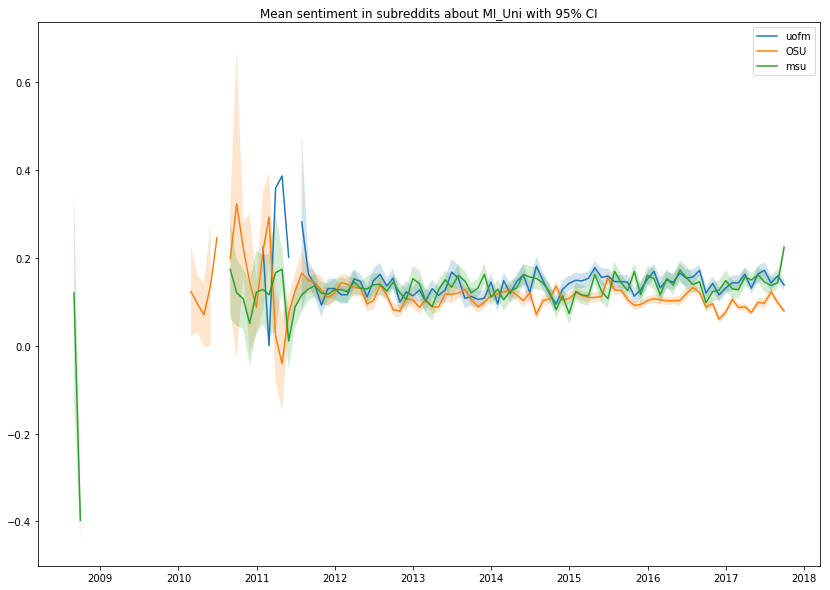

In [11]:
for s in scores:
    metaplot(topic='MI_Uni', metric=s, top=None)

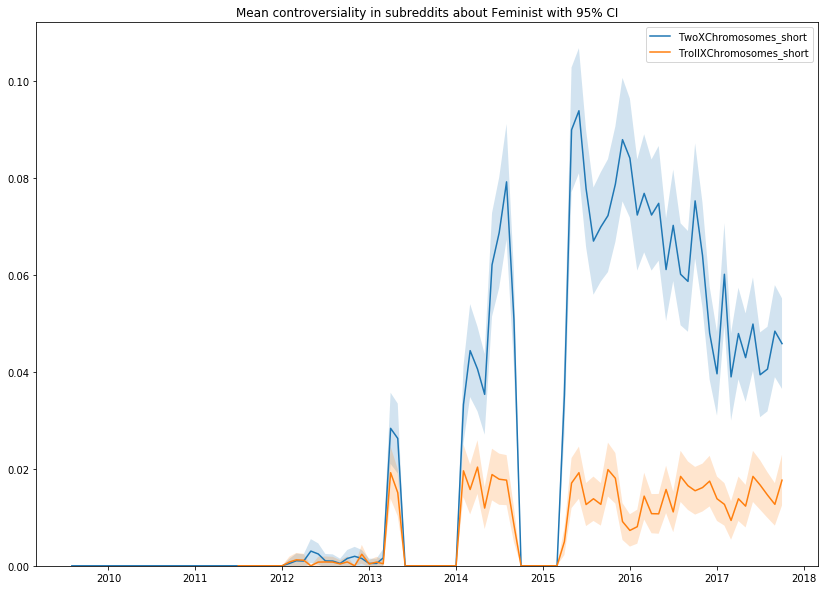

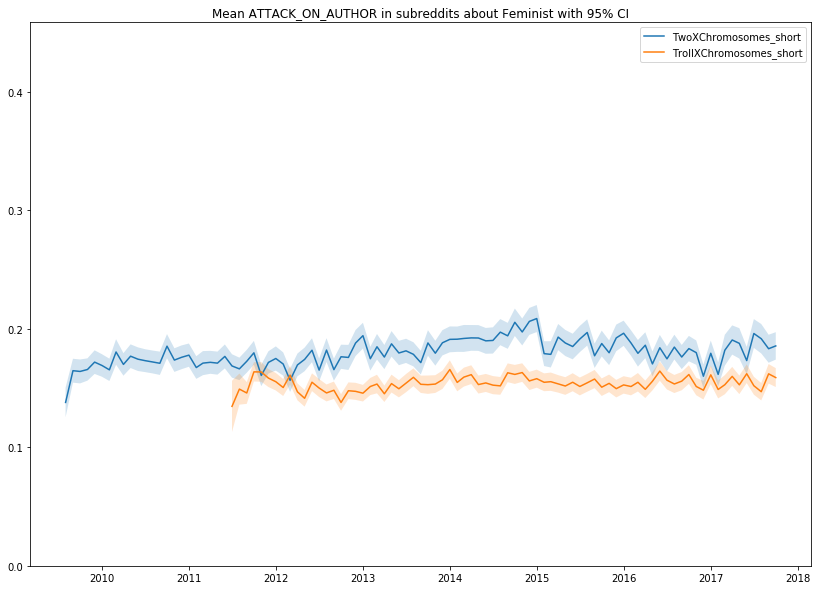

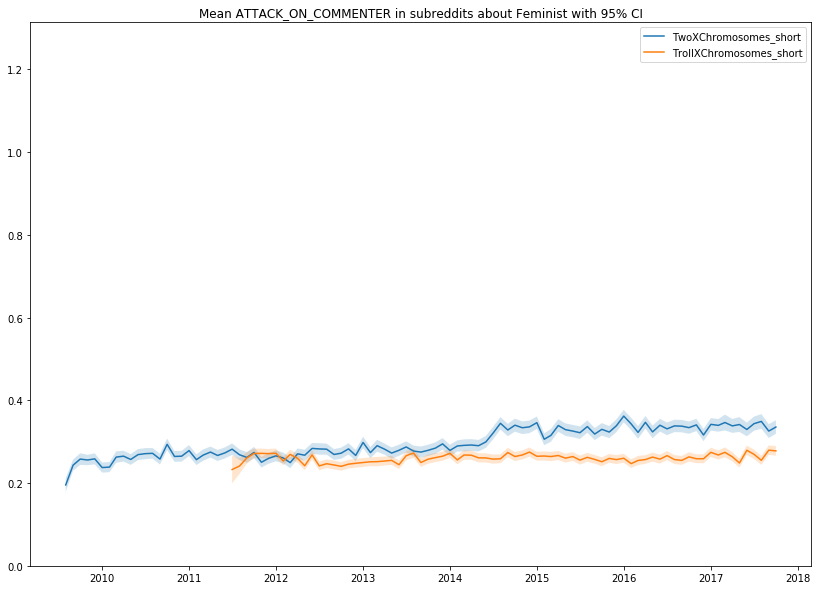

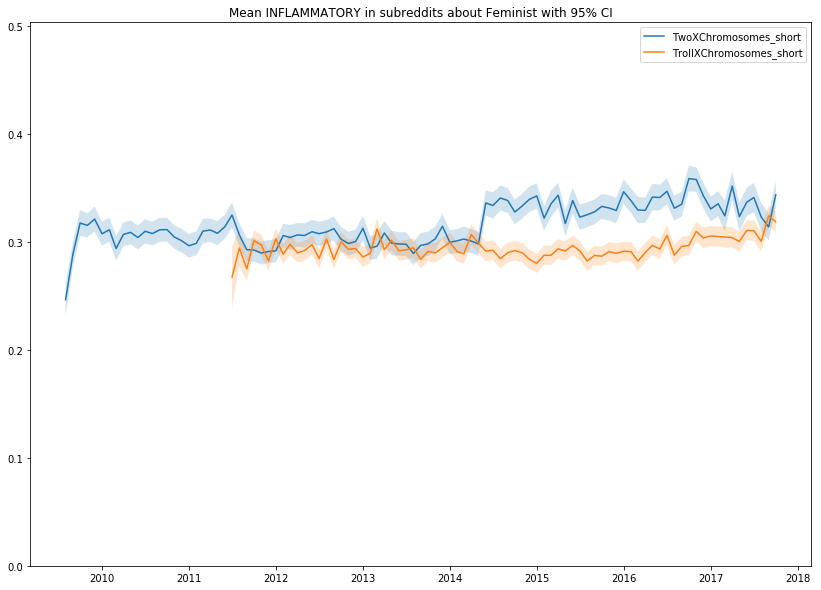

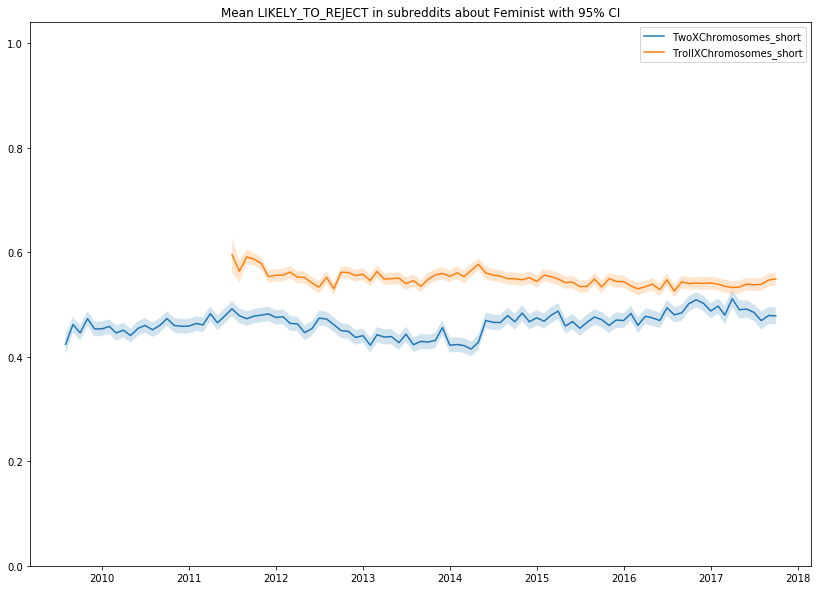

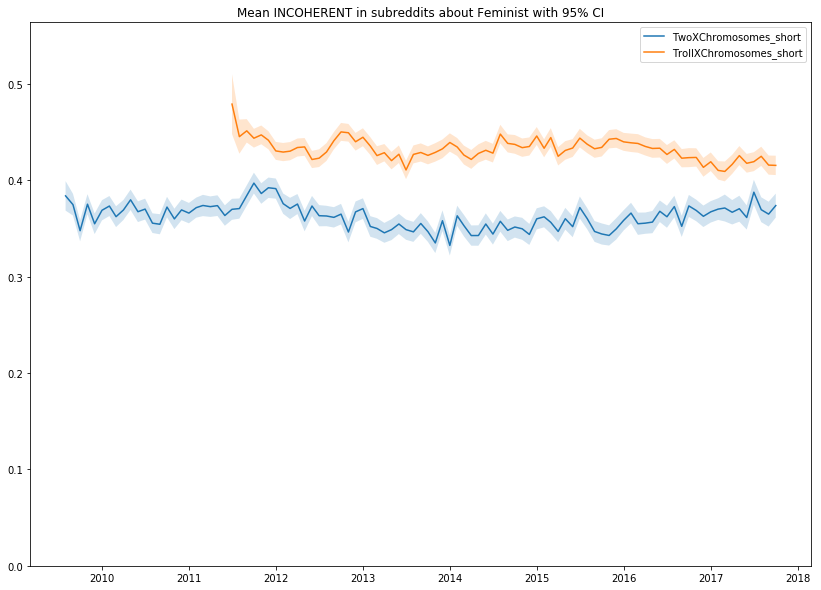

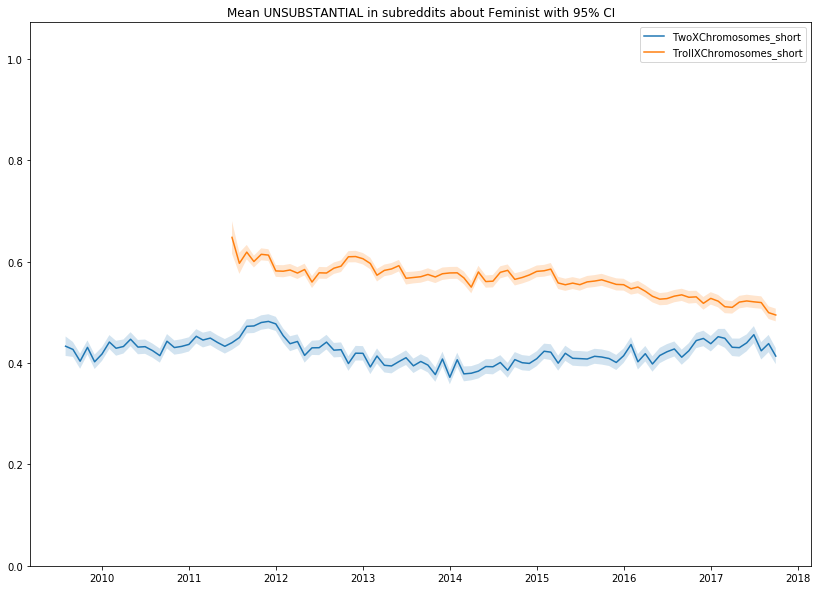

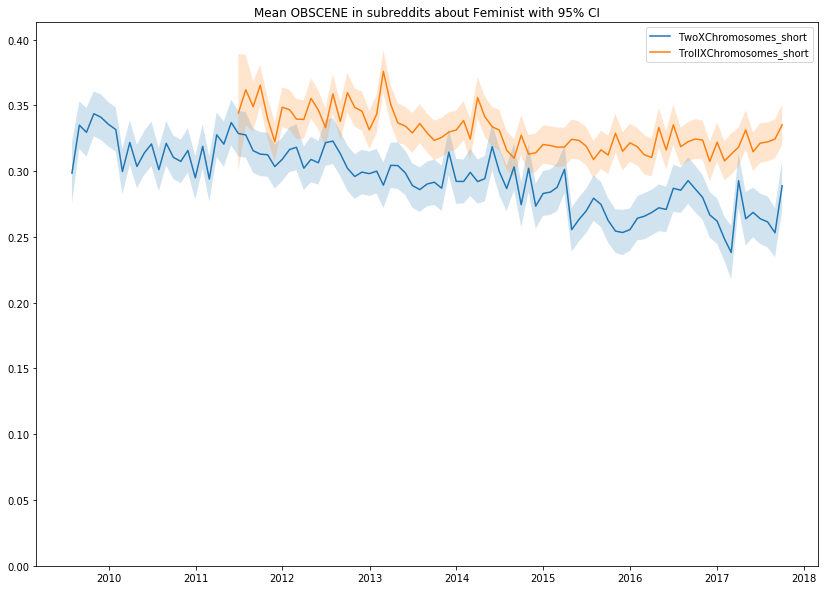

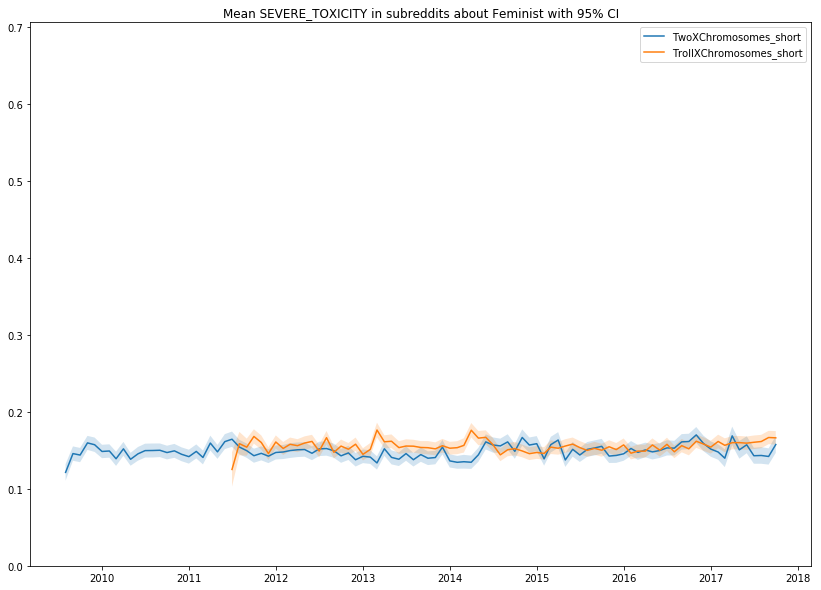

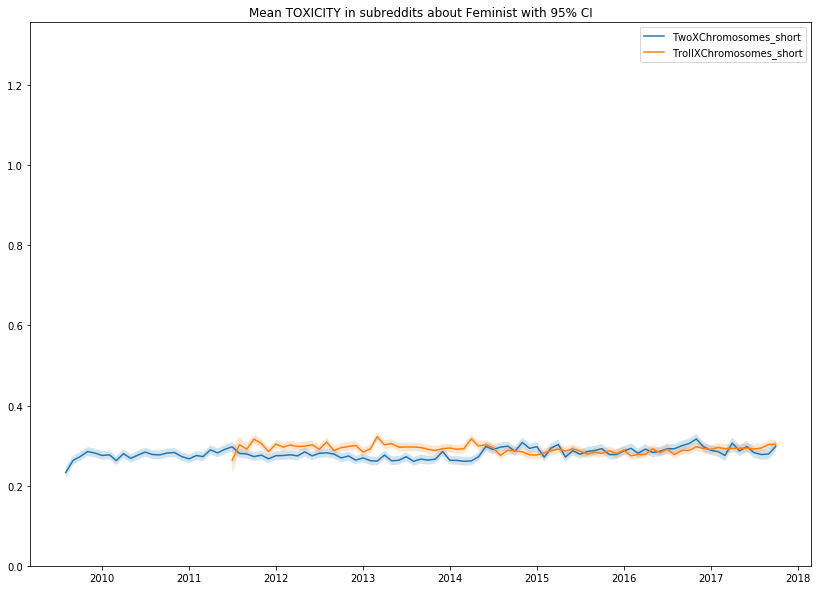

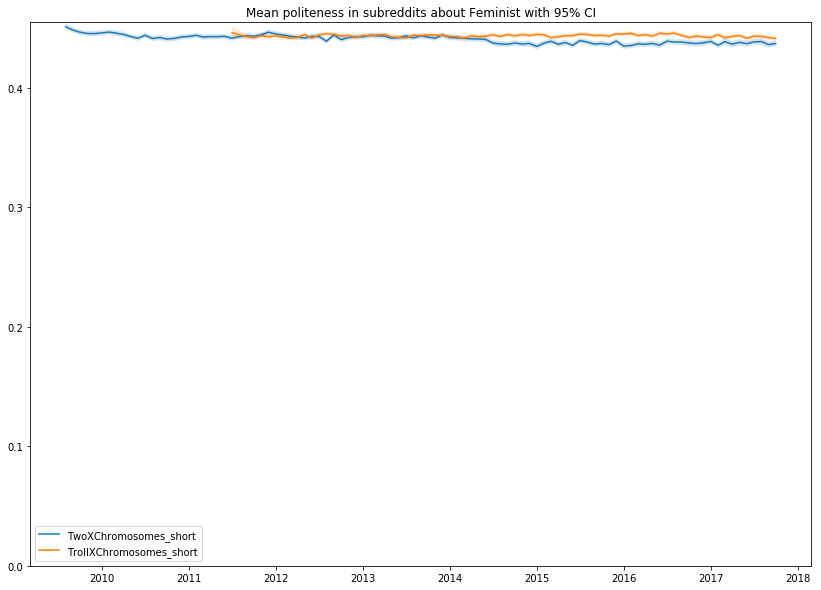

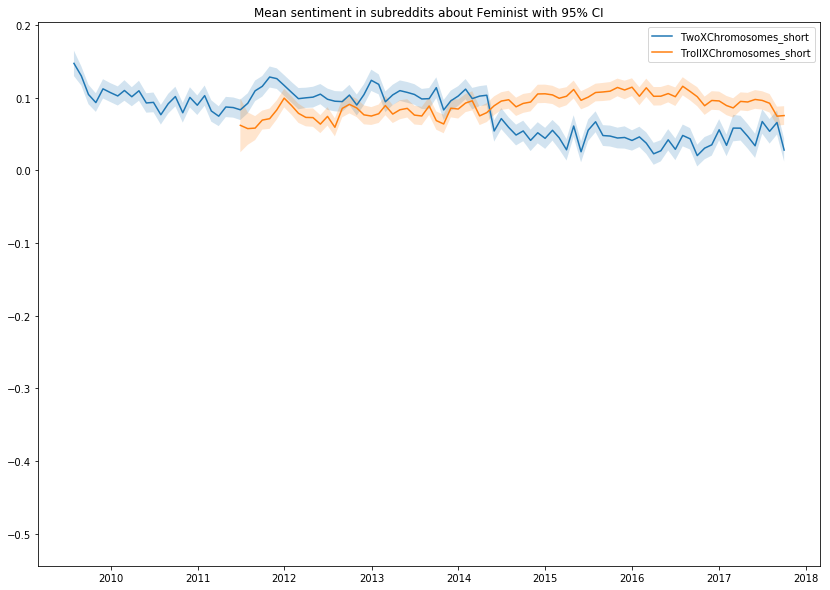

In [12]:
for s in scores:
    metaplot(topic='Feminist', metric=s, top=None)

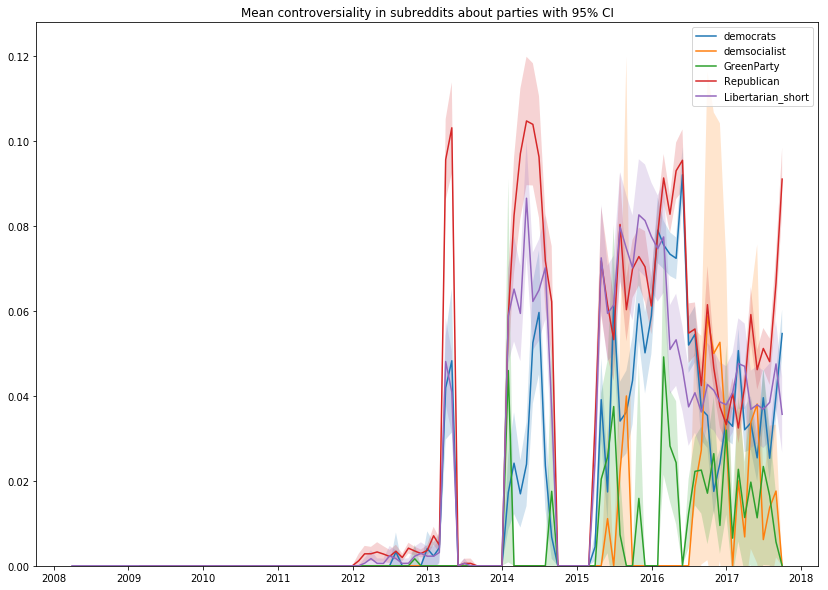

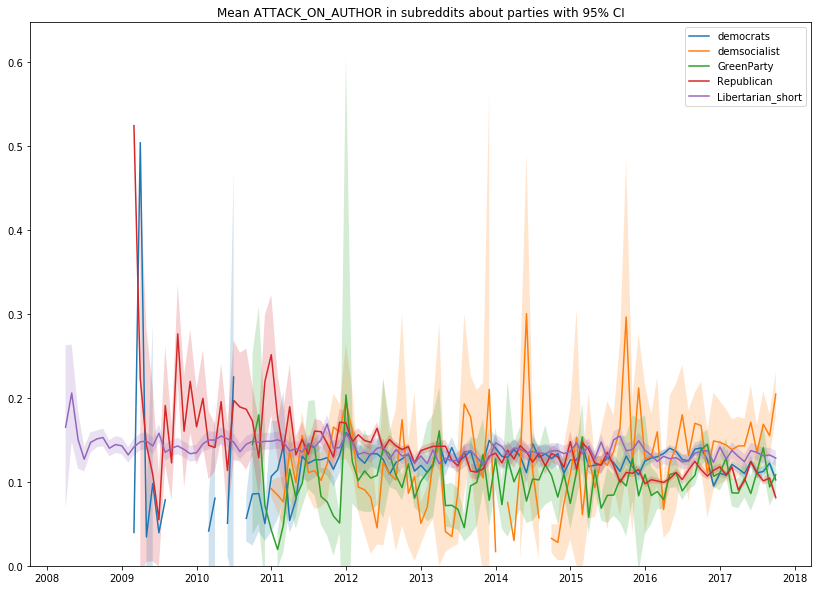

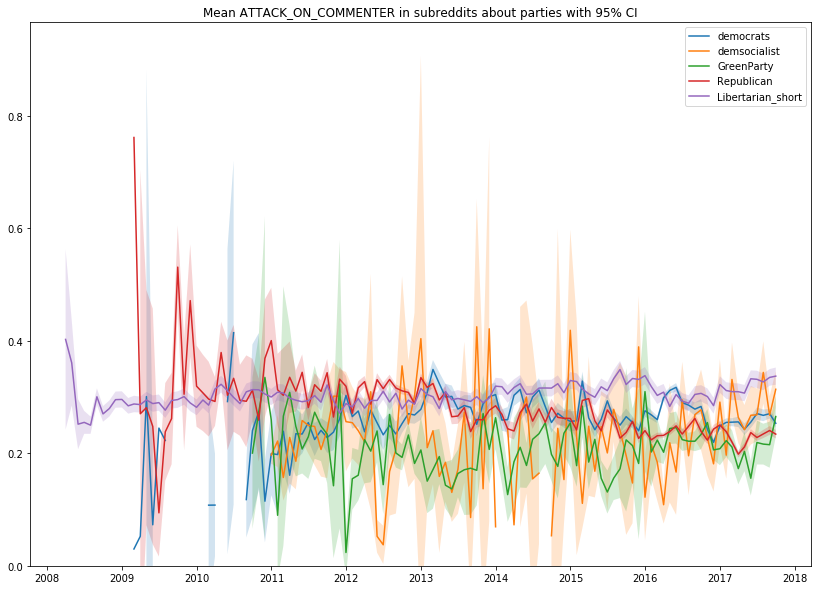

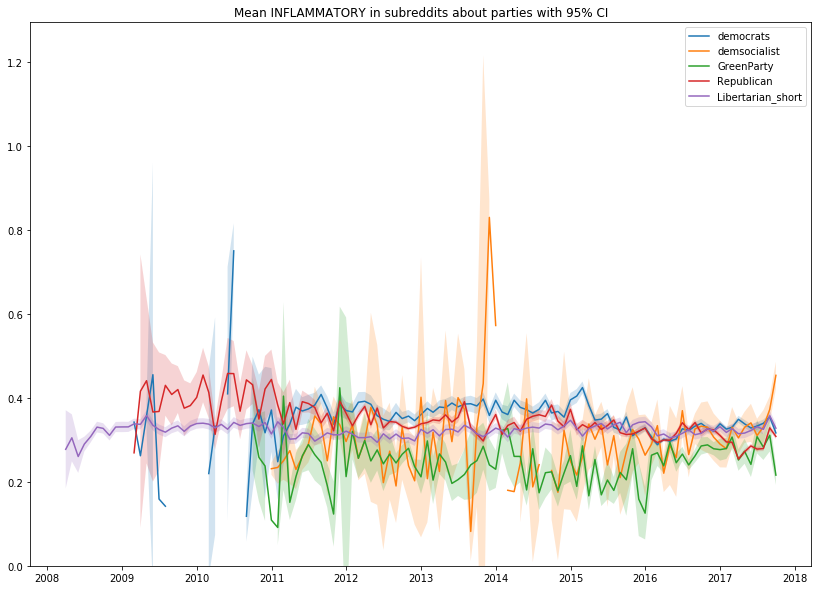

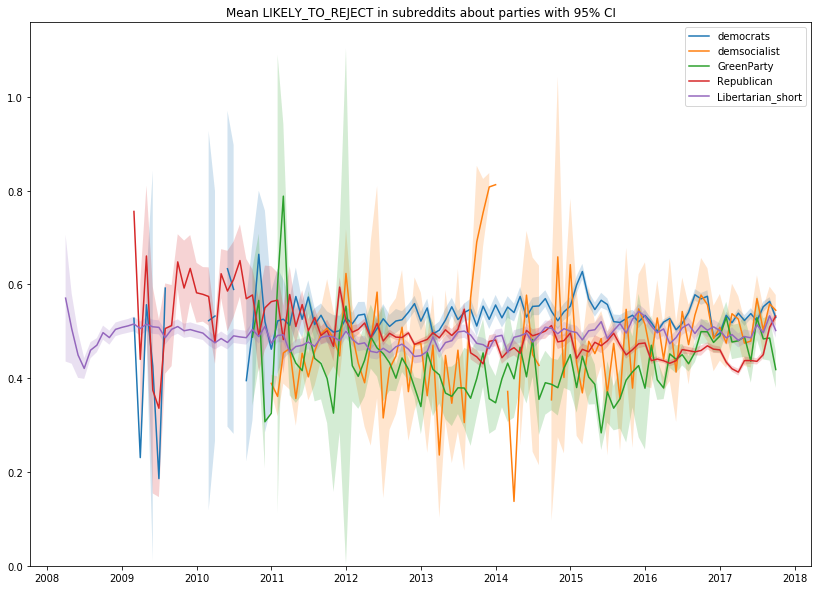

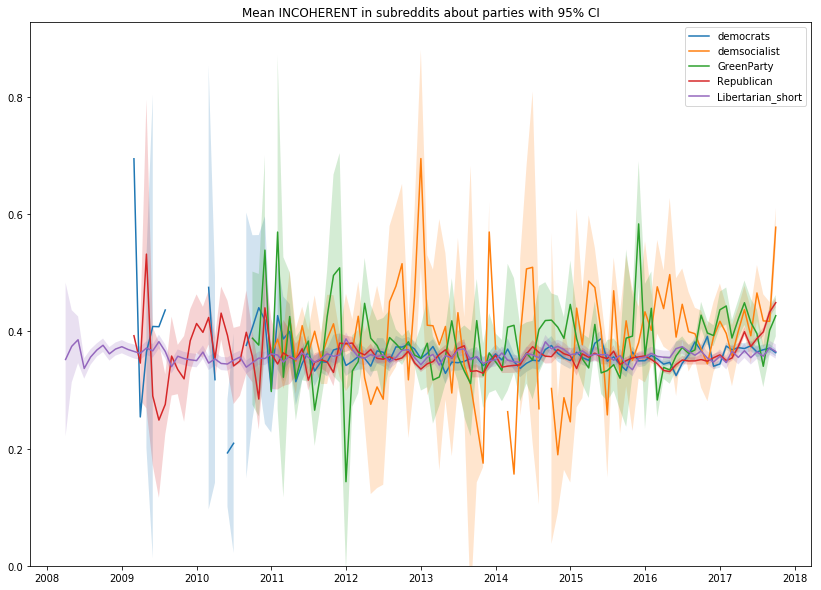

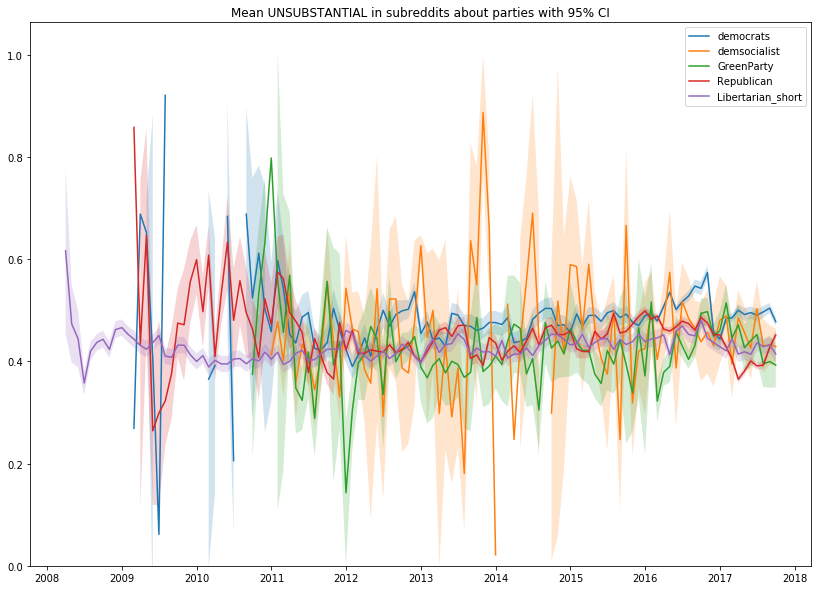

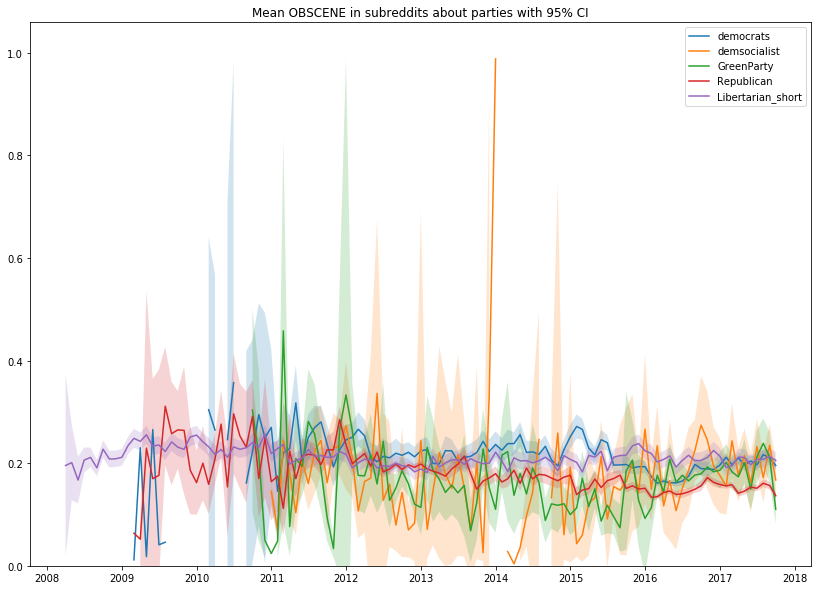

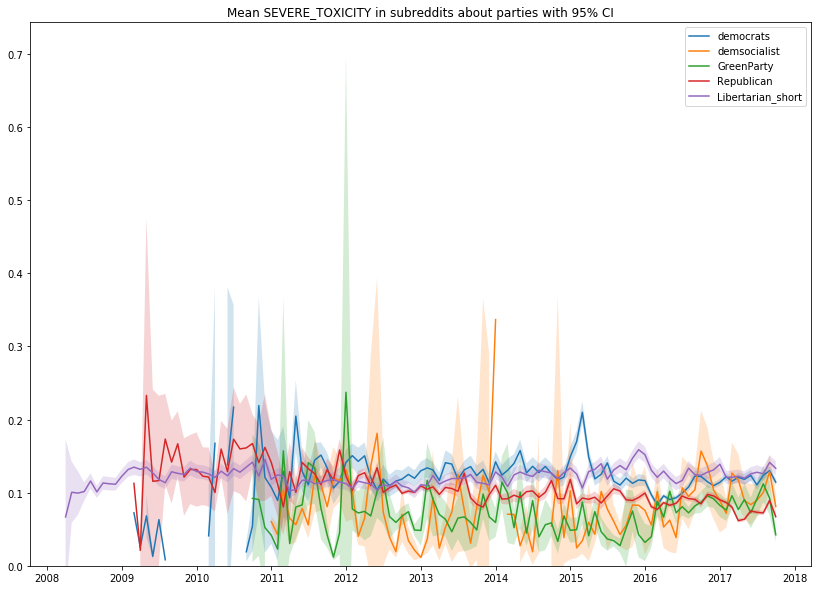

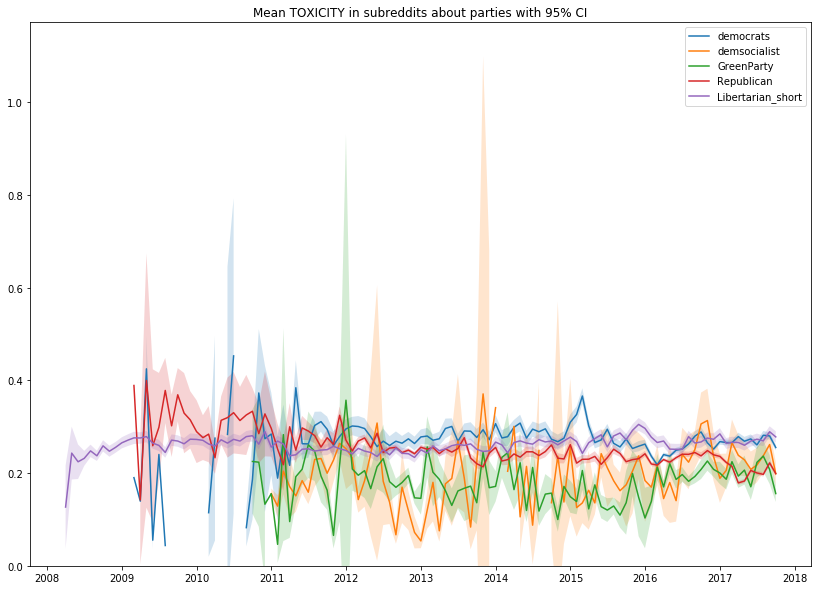

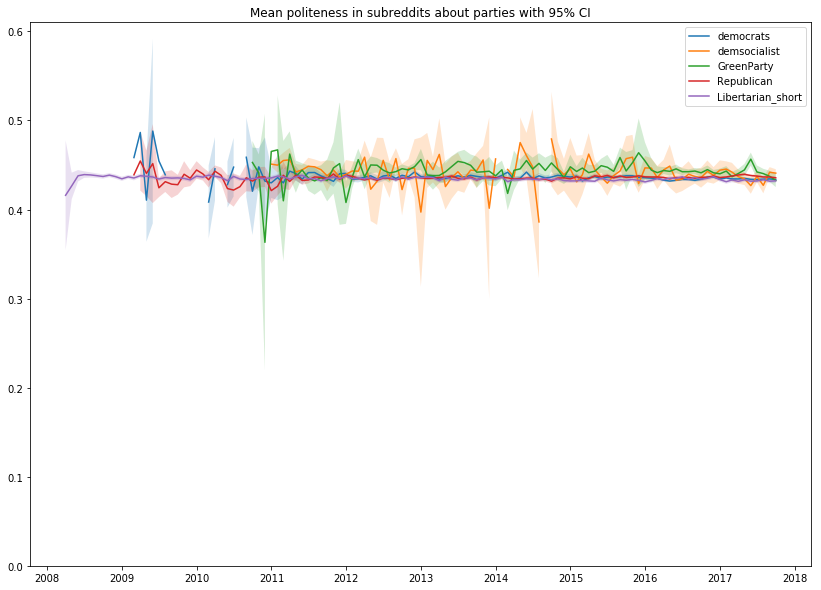

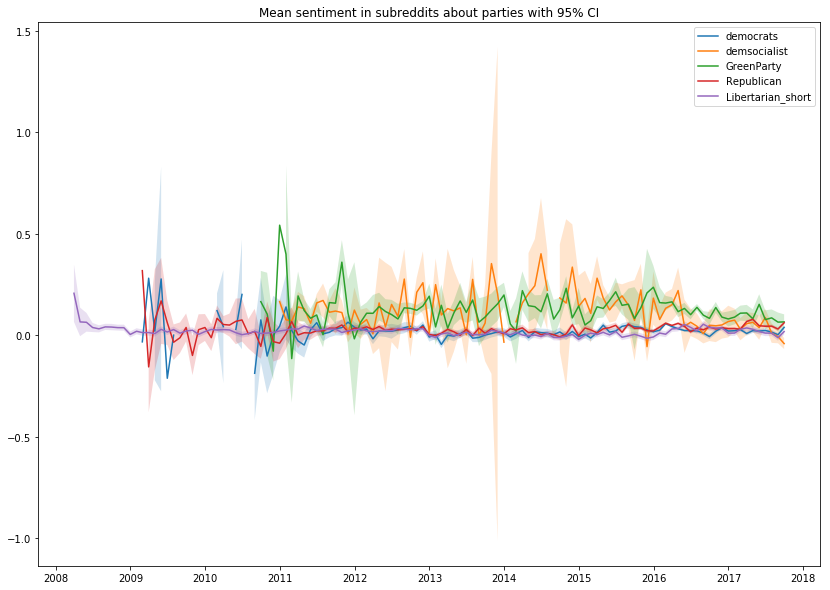

In [13]:
for s in scores:
    metaplot(topic='parties', metric=s, top=None)

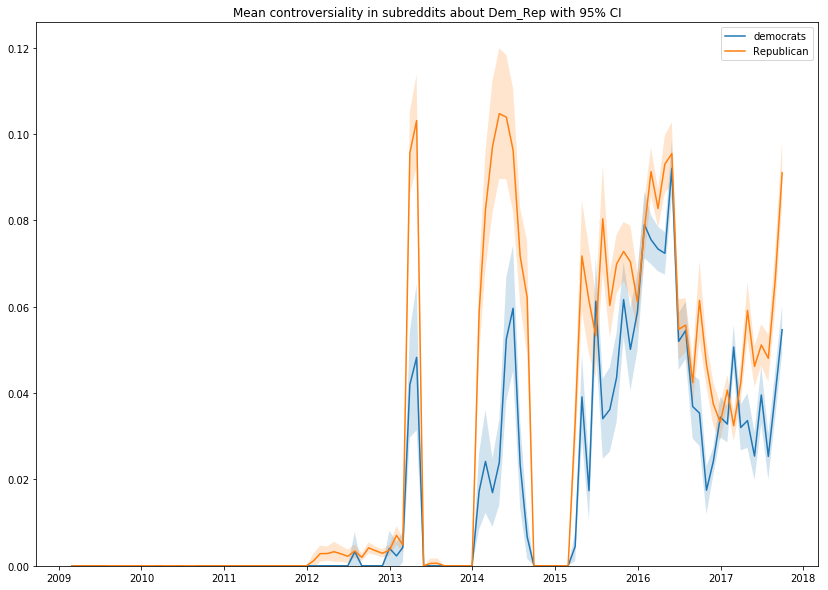

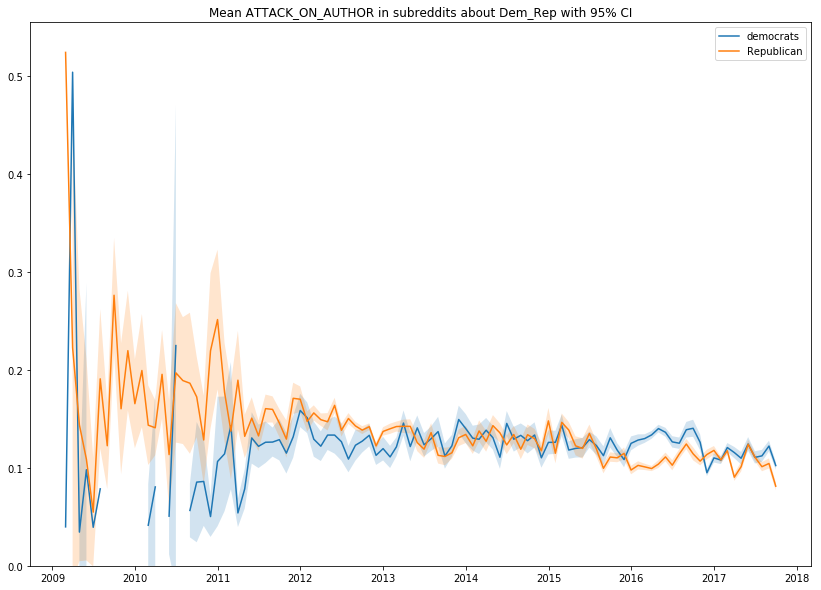

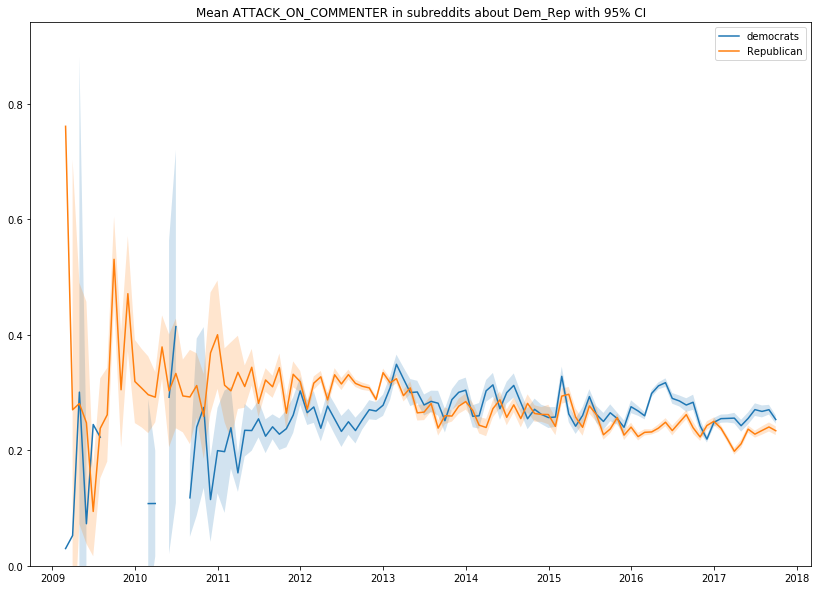

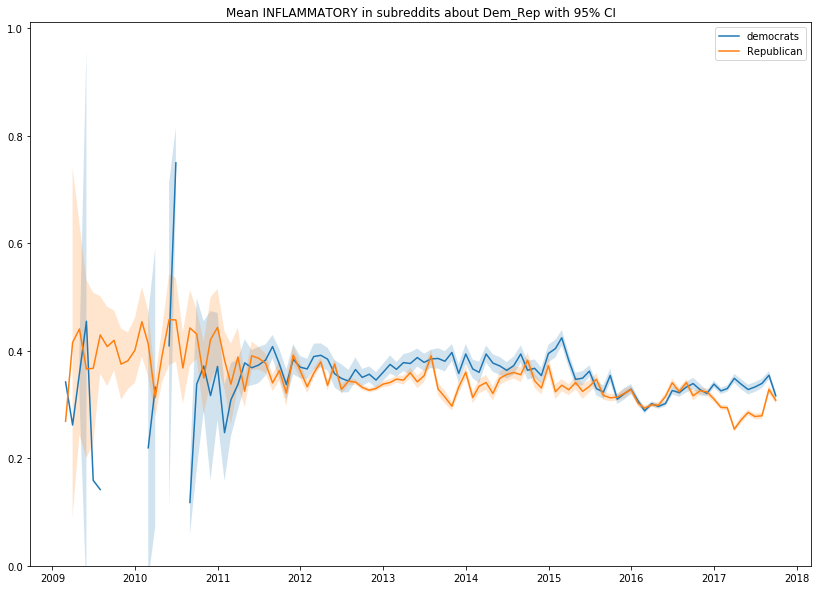

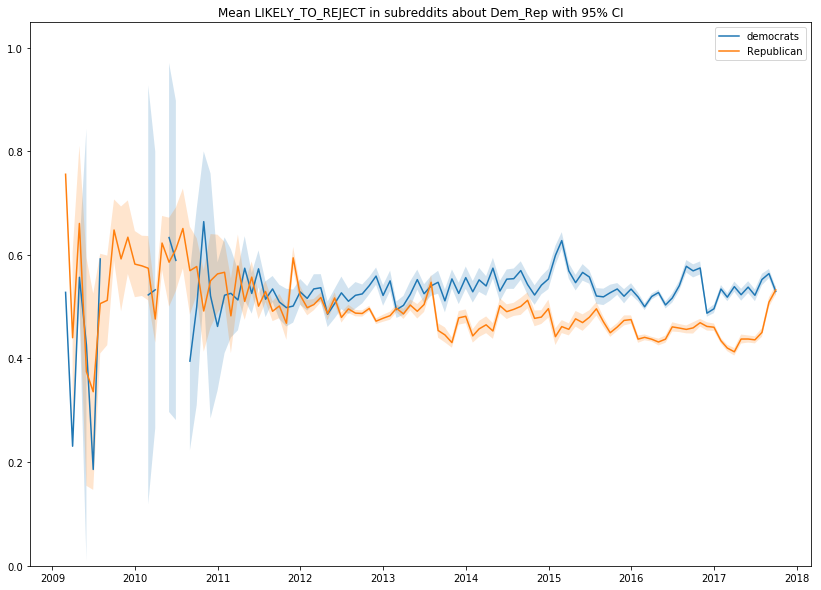

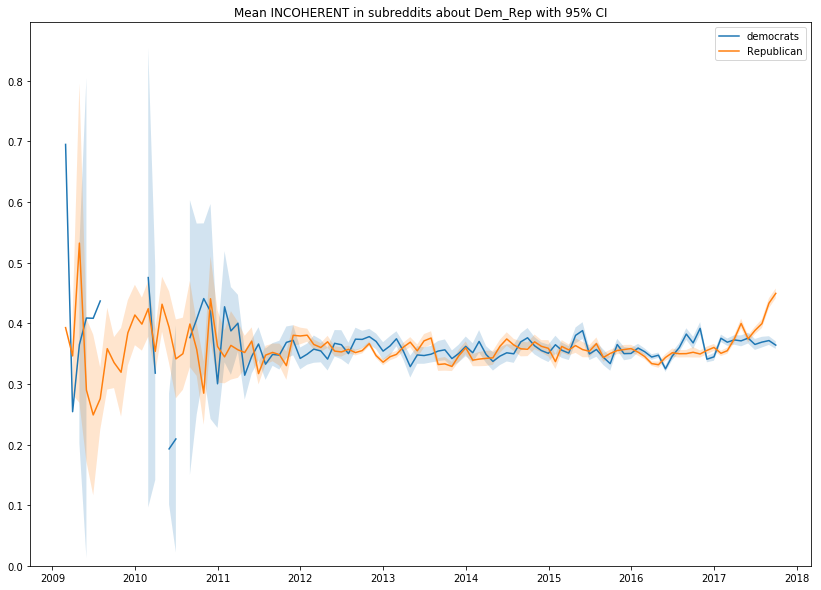

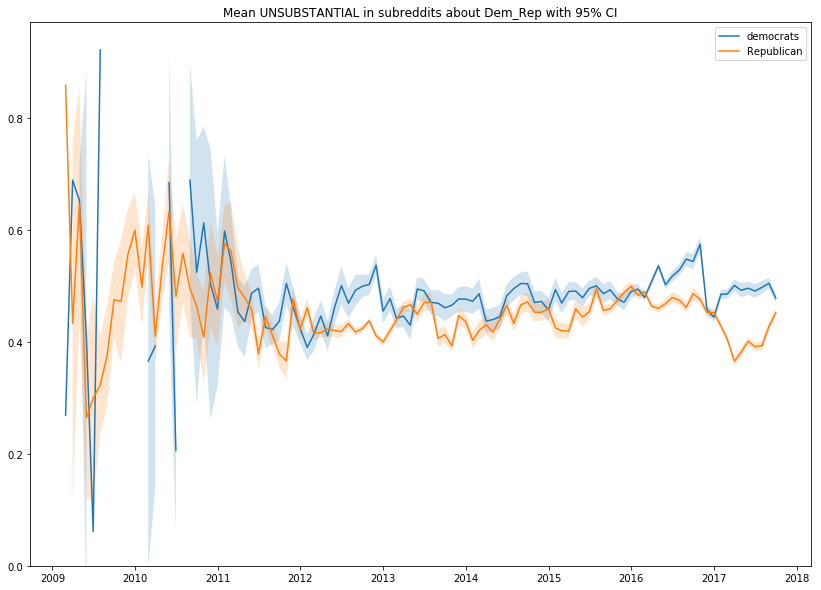

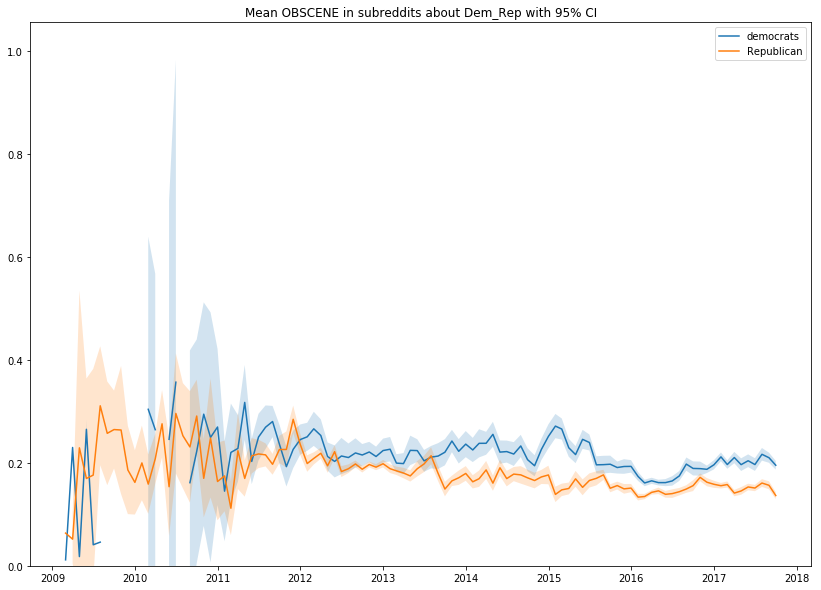

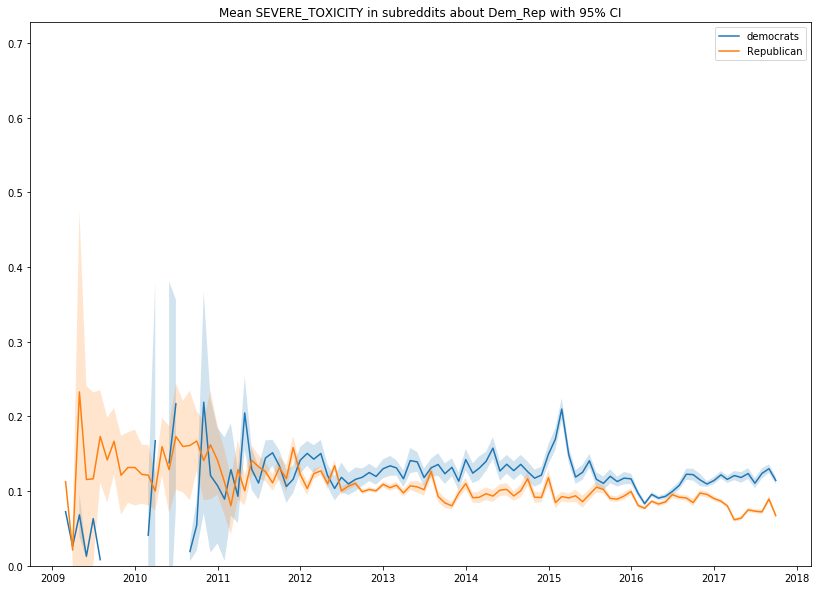

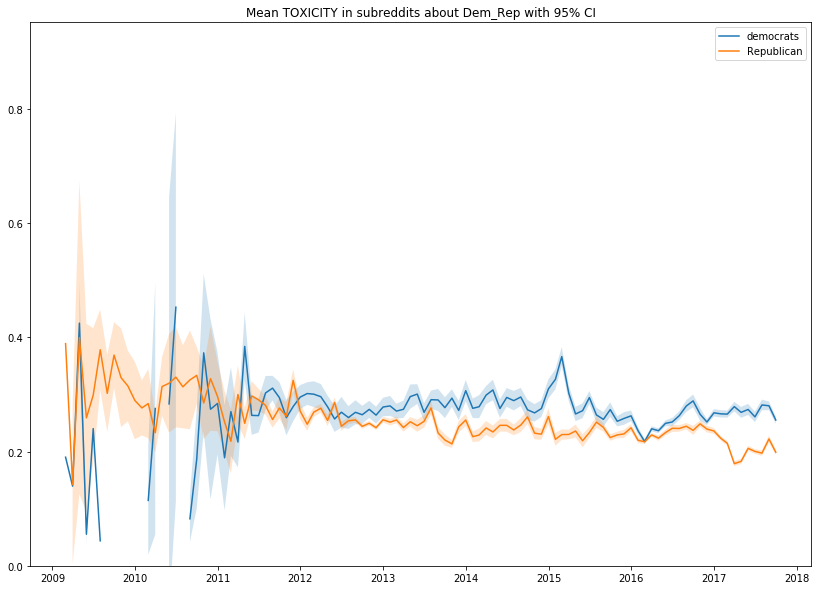

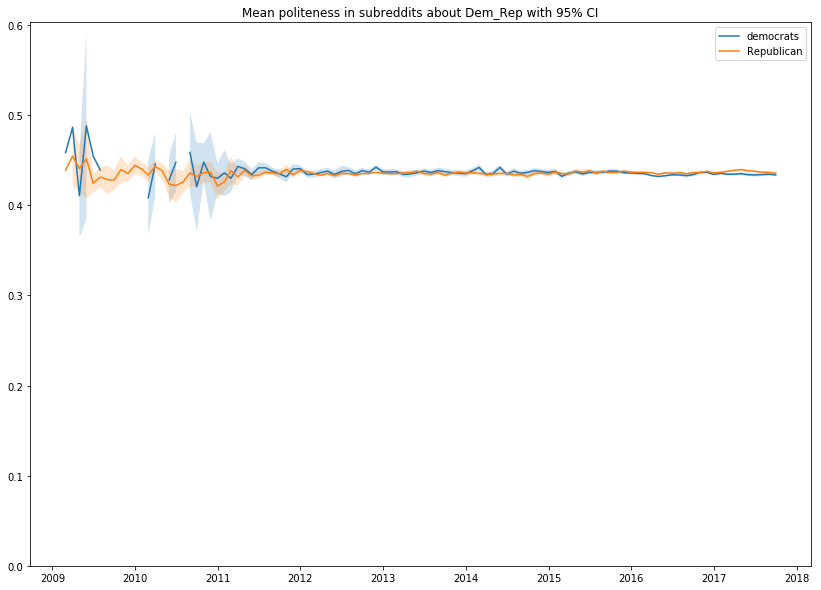

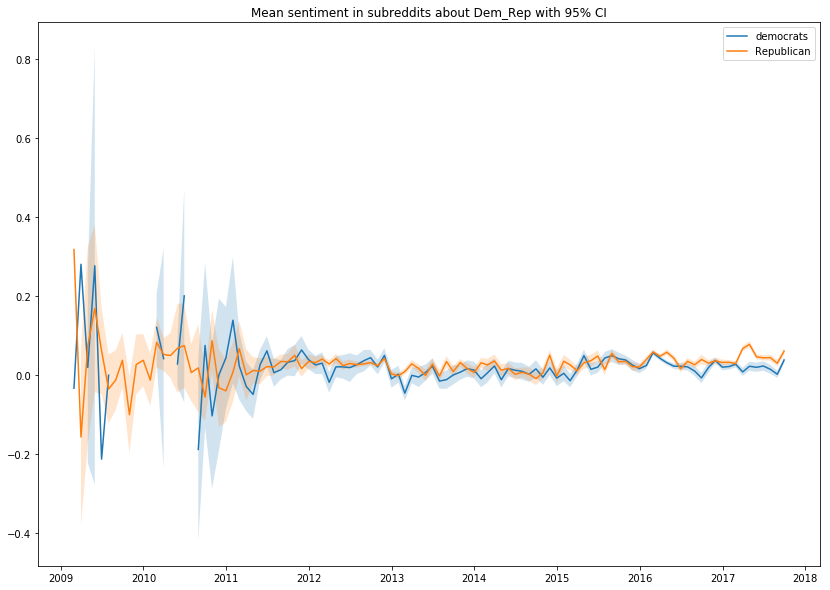

In [14]:
for s in scores:
    metaplot(topic='Dem_Rep', metric=s, top=None)

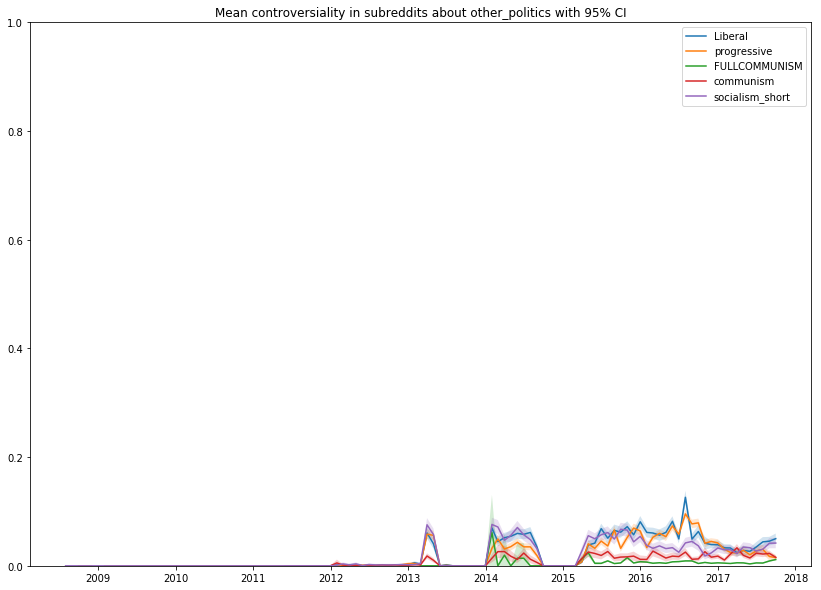

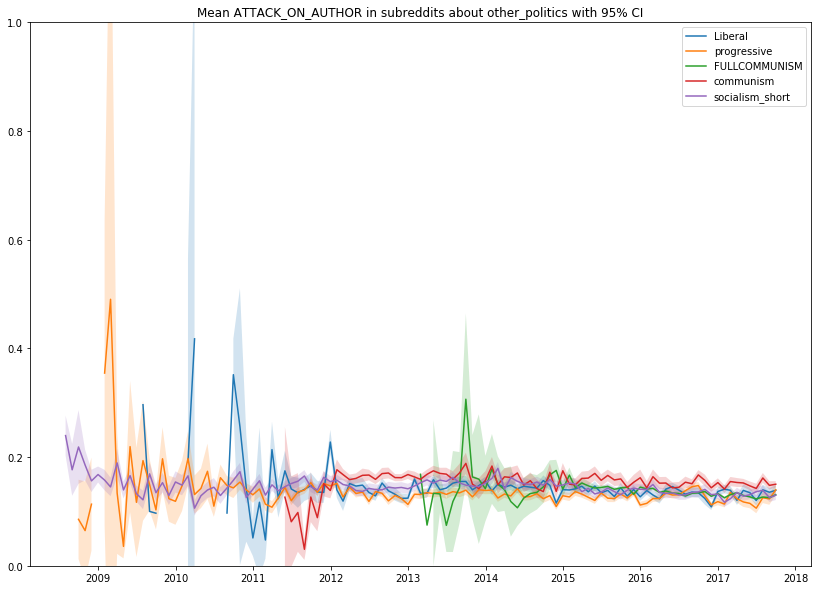

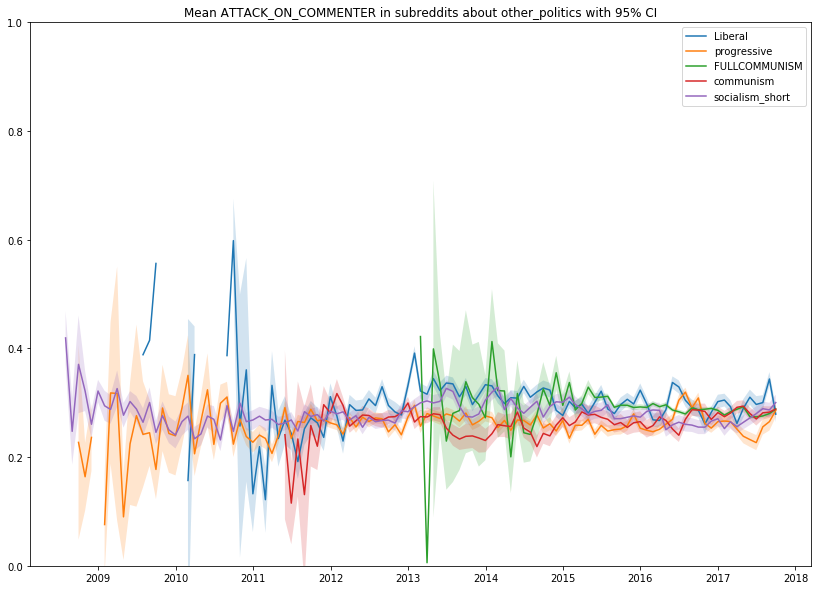

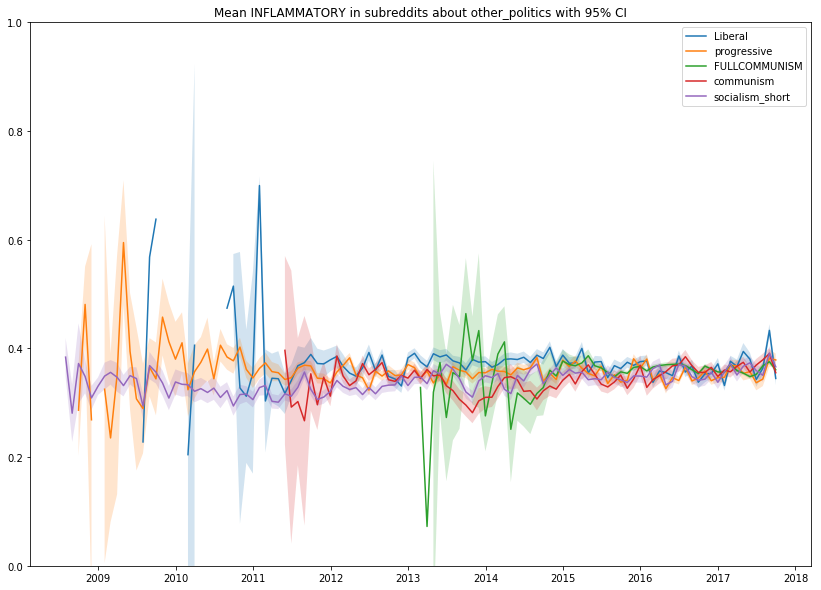

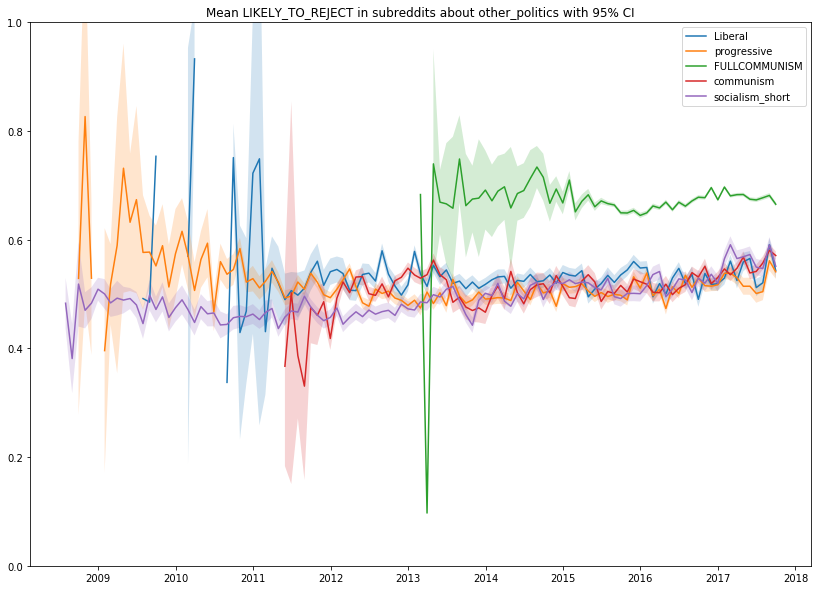

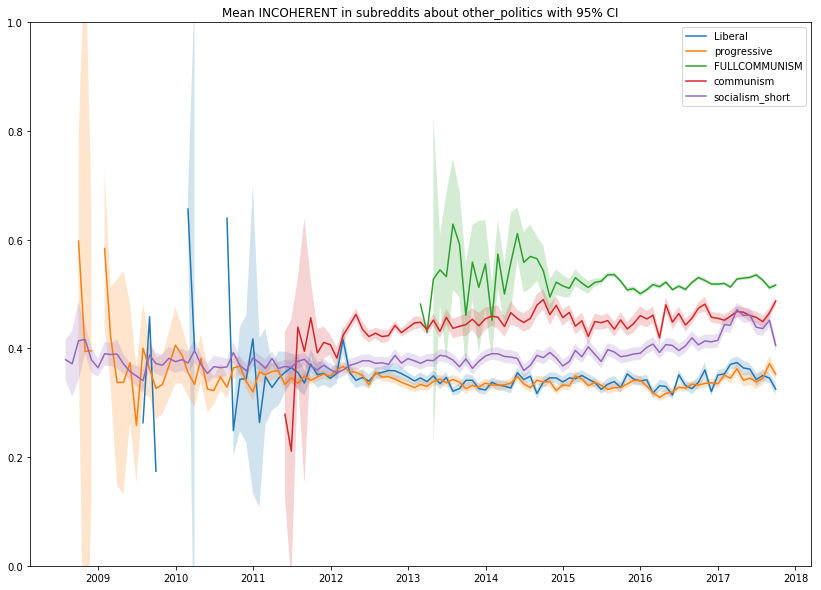

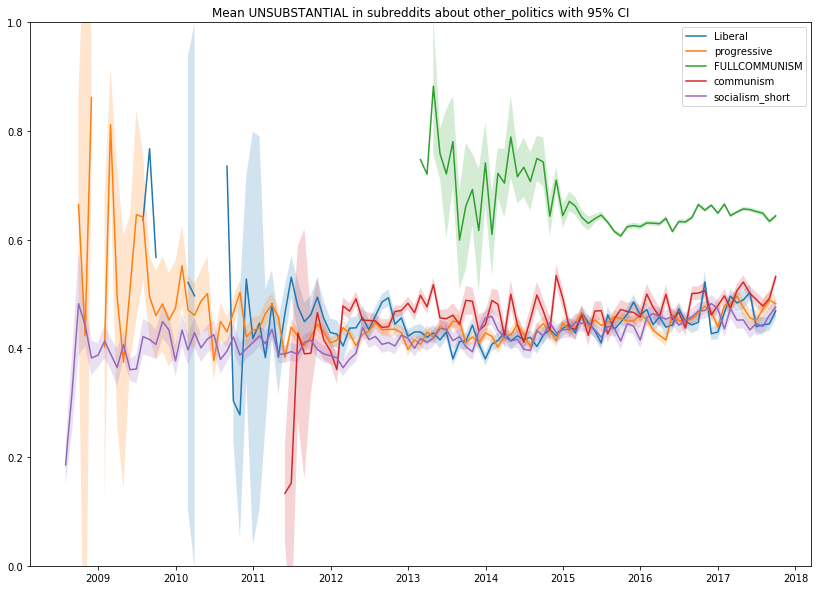

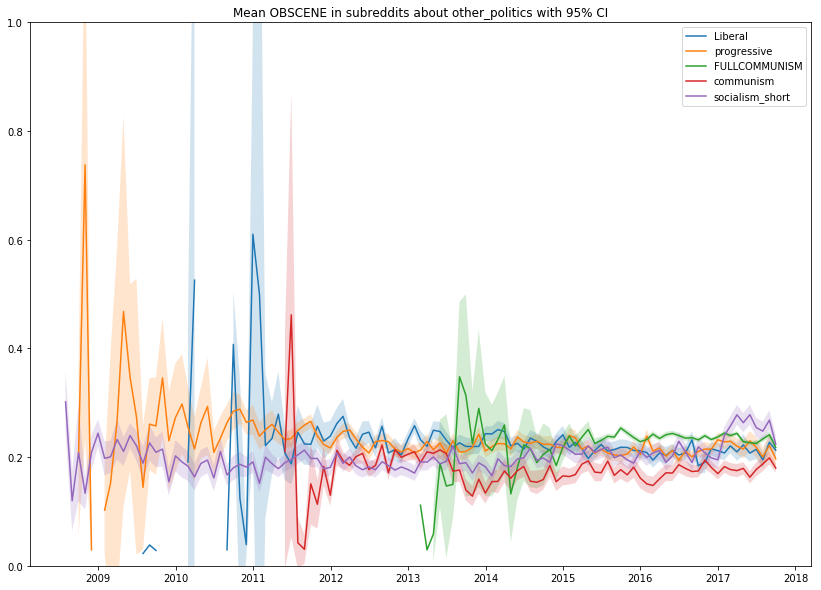

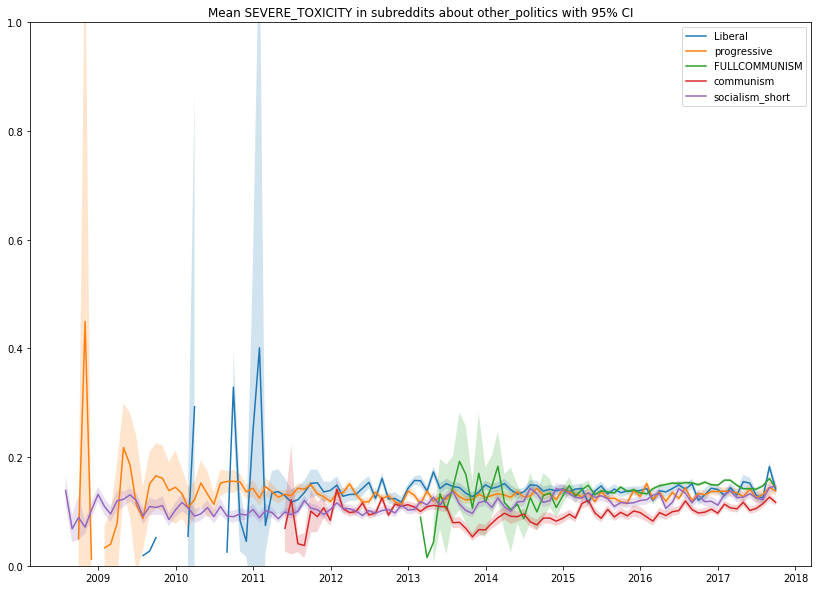

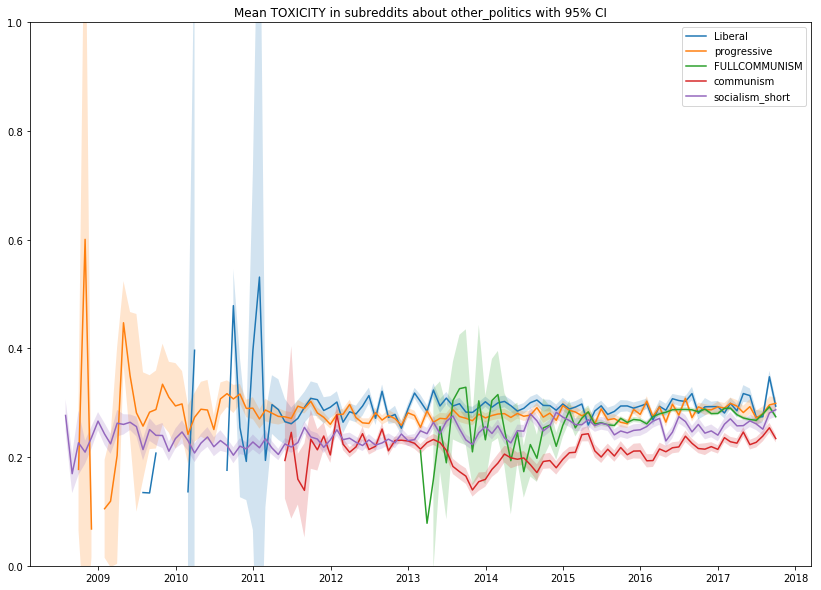

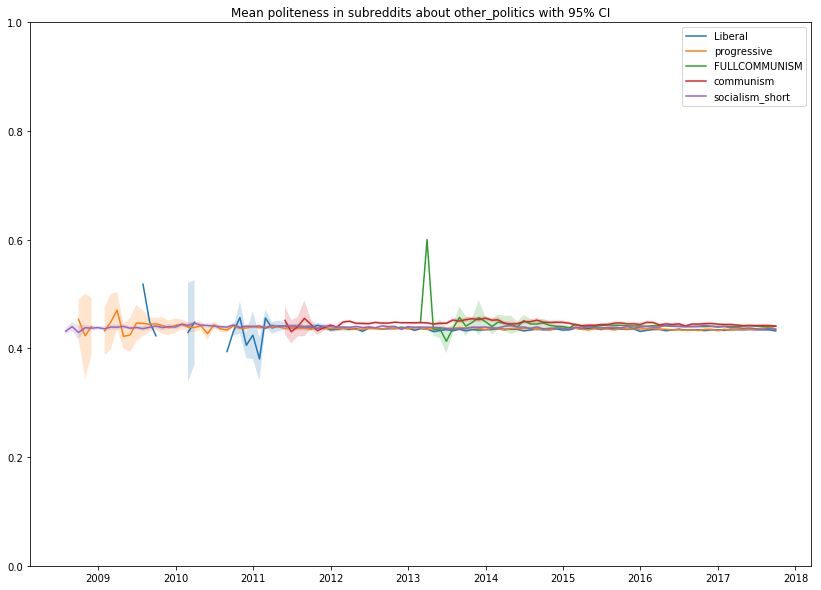

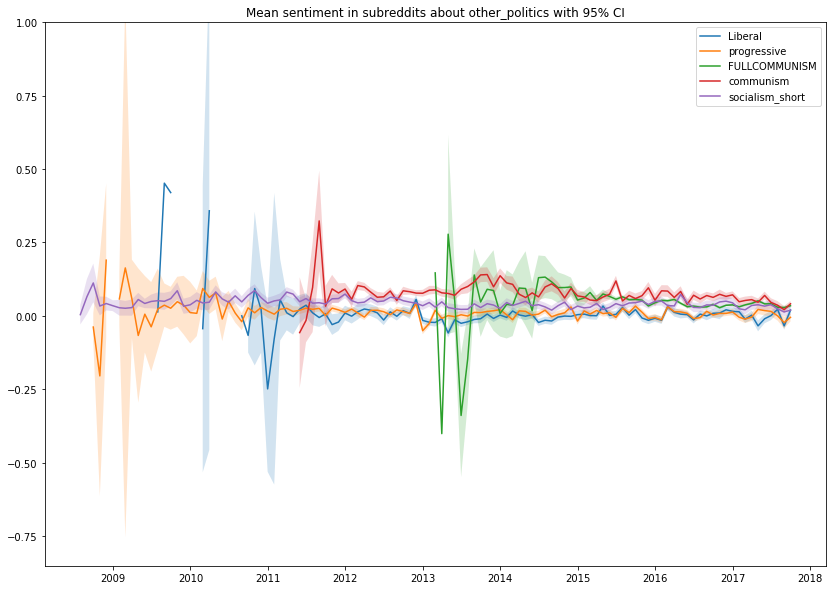

In [15]:
for s in scores:
    metaplot(topic='other_politics', metric=s, top=1)